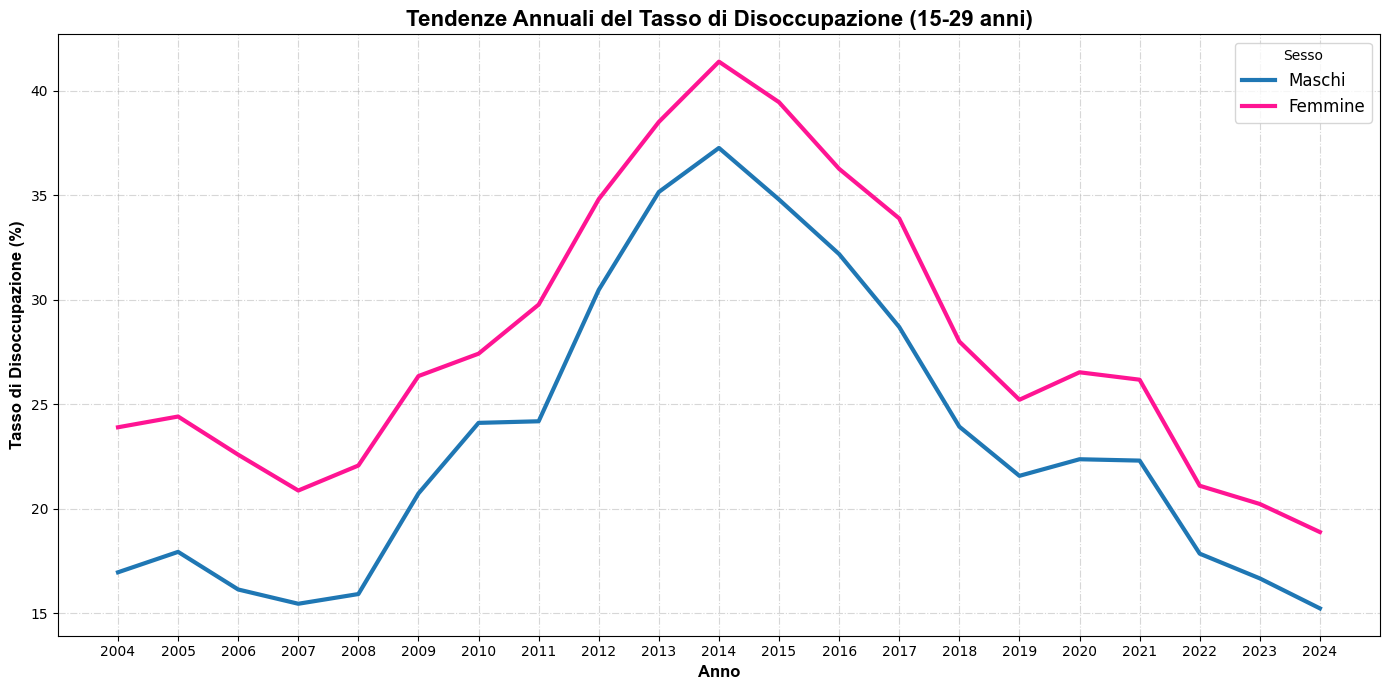

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)
# baseD = 'C:/Users/bregu/Desktop/UNIMI/VISUALIZZAZIONE SCIENTIFICA/progetto/'
file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file


# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
# Per il dataset 15-24 anni, possiamo usare i dati così come sono
# Per il dataset 18-29 anni, calcoliamo la media tra i 18-24 anni (inclusi)

# Gruppo 18-24 anni per dataset 18-29 (media dei dati)
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between('2018', '2024')]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni)', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Anno', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Miglioramento della leggibilità con griglie
plt.grid(True, linestyle='dashdot', alpha=0.5)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Mostrare il grafico
plt.show()

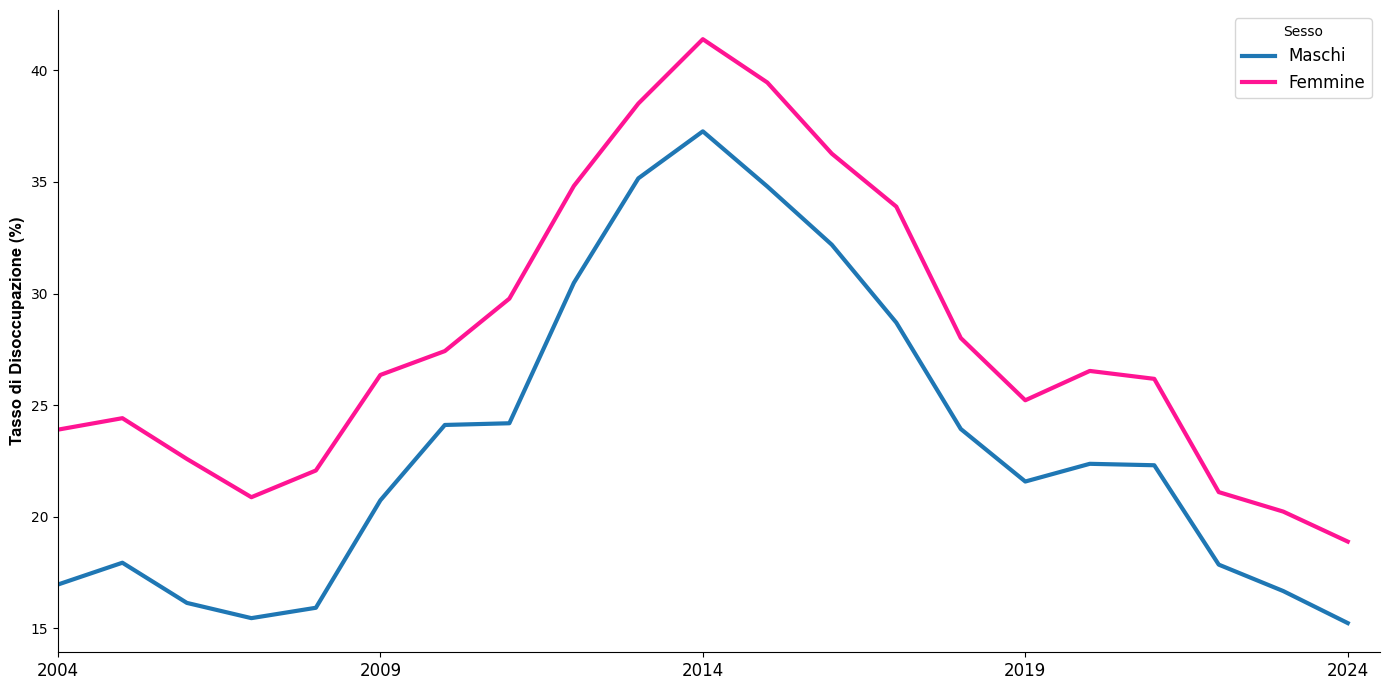

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')
plt.xlabel("") # Rimuovere l'etichetta dell'asse x

# Impostare le etichette dell'asse x ogni 5 anni, dal 2004 al 2024
xticks = [year for year in range(2004, 2025, 5)]
plt.xticks(ticks=xticks, labels=xticks, fontsize=12)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Impostare i limiti dell'asse X in modo che non ci sia spazio vuoto
# plt.xlim([2004, None]) 
plt.xlim([2004, combined_data['Anno'].max() + 0.5])  # Aggiunge un anno come margine


# Rimuovere gli assi superiore e destro
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrare il grafico
plt.show()

andamento del tasso di disoccupazione maschi e femmine (tra 15 e 29 anni in italia) dal 2004 al 2024

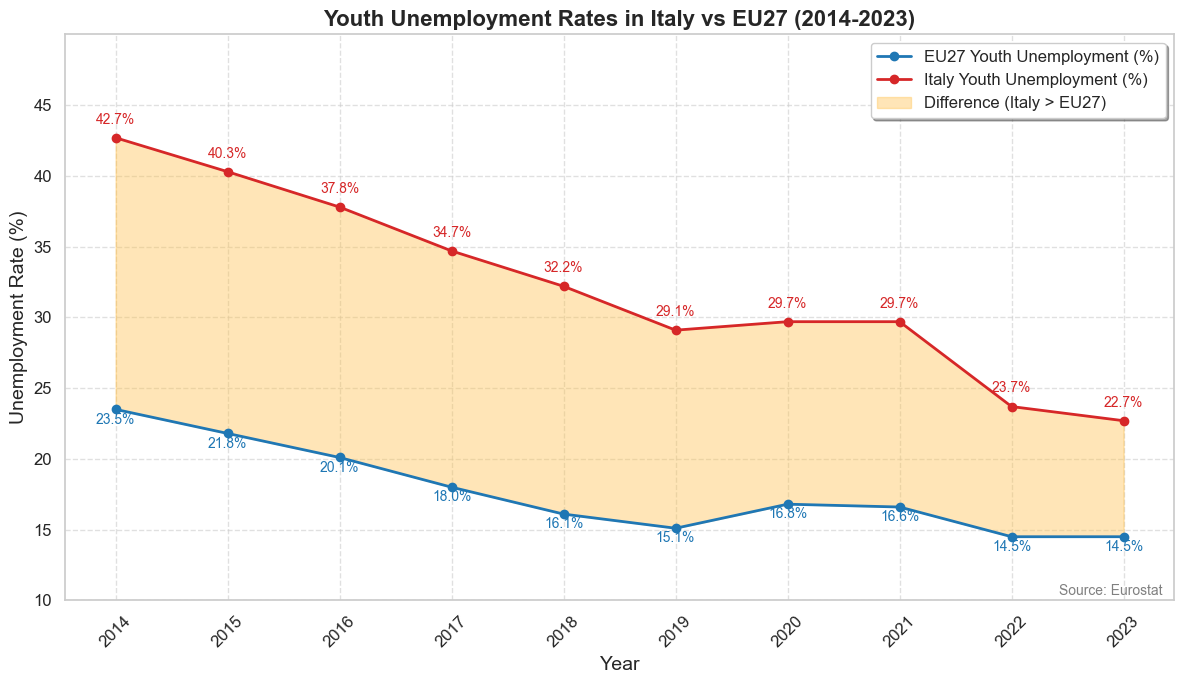

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
eu27 = [23.5, 21.8, 20.1, 18.0, 16.1, 15.1, 16.8, 16.6, 14.5, 14.5]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Crea il grafico
plt.figure(figsize=(12, 7))

# Applica uno stile Seaborn (opzionale)
sns.set_theme(style="whitegrid") 

# Linee dei dati
plt.plot(years, eu27, marker='o', label='EU27 Youth Unemployment (%)', color='#1f77b4', linewidth=2)
plt.plot(years, italy, marker='o', label='Italy Youth Unemployment (%)', color='#d62728', linewidth=2)

# Evidenziazione delle differenze
plt.fill_between(years, eu27, italy, where=(np.array(italy) > np.array(eu27)), 
                 color='#FFC04C', alpha=0.4, label='Difference (Italy > EU27)')

# Etichette personalizzate
for i, (y_eu, y_it) in enumerate(zip(eu27, italy)):
    if not np.isnan(y_it) and not np.isnan(y_eu):
        plt.text(years[i], y_it + 1, f"{y_it:.1f}%", color='#d62728', fontsize=10, ha='center')
        plt.text(years[i], y_eu - 1, f"{y_eu:.1f}%", color='#1f77b4', fontsize=10, ha='center')

# Titolo e descrizione
plt.title('Youth Unemployment Rates in Italy vs EU27 (2014-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)

# Personalizzazione degli assi
plt.xticks(years, fontsize=12, rotation=45)
plt.yticks(np.arange(10, 50, 5), fontsize=12)
plt.ylim(10, 50)

# Legenda e griglia
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostra il grafico
plt.tight_layout()
plt.show()


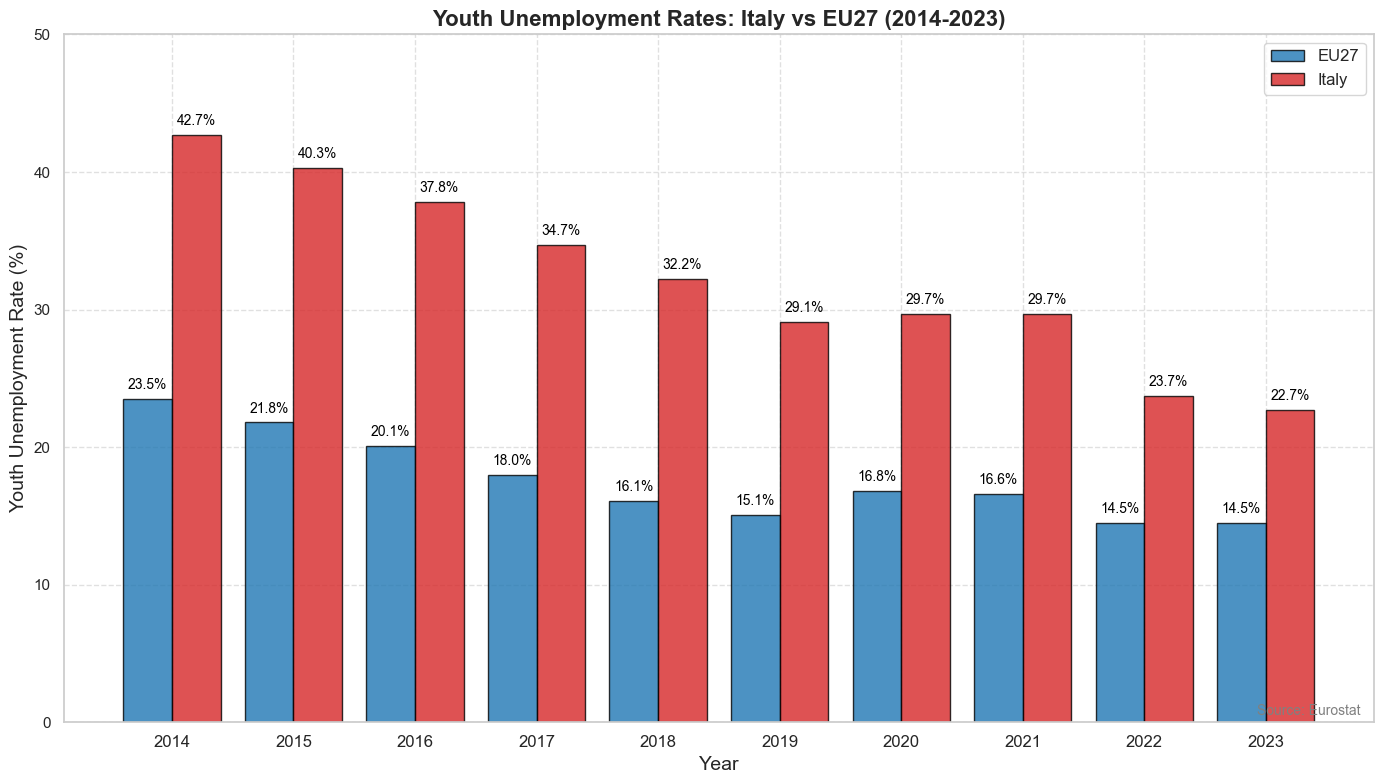

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
eu27 = [23.5, 21.8, 20.1, 18.0, 16.1, 15.1, 16.8, 16.6, 14.5, 14.5]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Configurazione del grafico
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Impostazione della posizione delle barre
x = np.arange(len(years))  # Posizioni per le barre
width = 0.4  # Larghezza delle barre

# Creazione delle barre
bars1 = plt.bar(x - width/2, eu27, width, label='EU27', color='#1f77b4', edgecolor='black', alpha=0.8)
bars2 = plt.bar(x + width/2, italy, width, label='Italy', color='#d62728', edgecolor='black', alpha=0.8)

# Aggiunta delle etichette di valore sulle barre
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

# Aggiunta di etichette, titolo e legenda
plt.xticks(x, years, fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Youth Unemployment Rate (%)', fontsize=14)
plt.title('Youth Unemployment Rates: Italy vs EU27 (2014-2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')

# Limiti e griglia
plt.ylim(0, 50)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


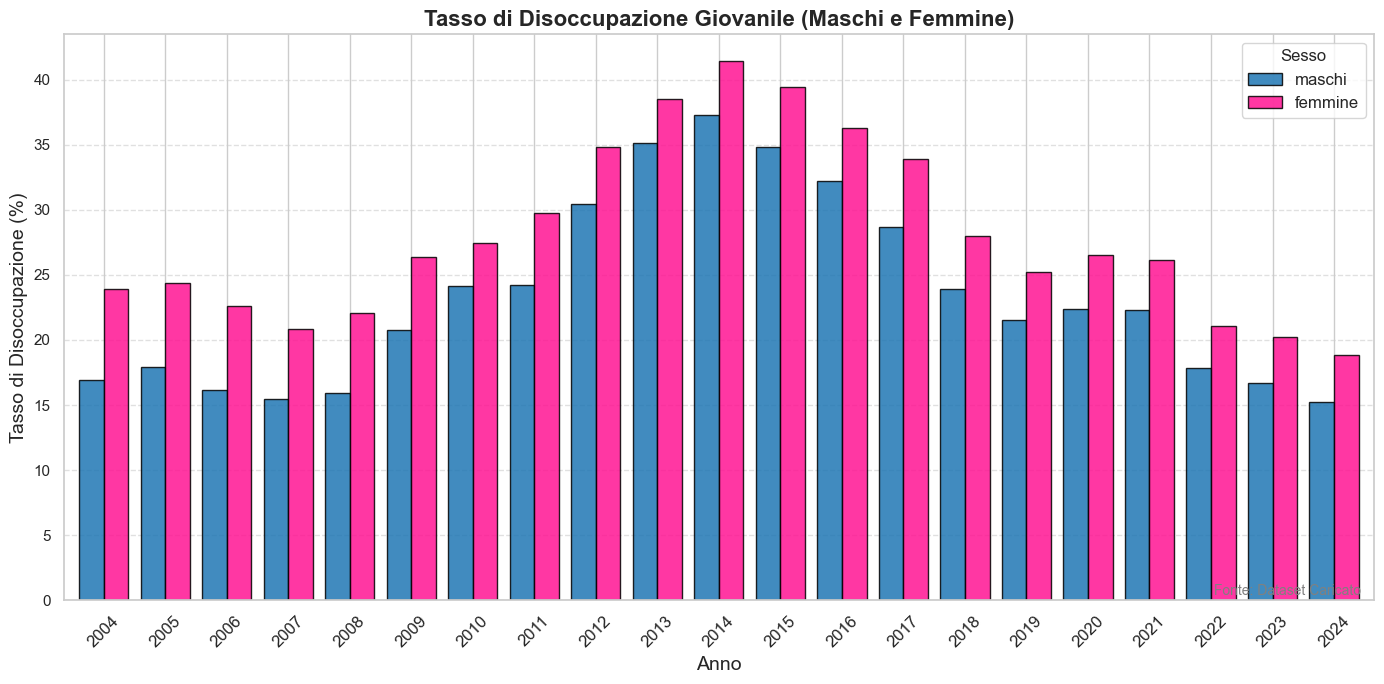

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Rimuovere la colonna del totale se presente
# Assumiamo che "Totale" sia una colonna extra che non vogliamo includere nel grafico
pivot_combined_data = pivot_combined_data[['maschi', 'femmine']]  # Se ci fosse una colonna "Totale", la rimuoviamo

# Creare il grafico a barre separate
plt.figure(figsize=(14, 7))

# Generare le barre per ogni gruppo separato (maschi e femmine)
pivot_combined_data.plot(kind='bar', color=['#1f77b4', '#ff1493'], width=0.8, alpha=0.85, edgecolor='black', ax=plt.gca())

# Titolo e etichette
plt.title('Tasso di Disoccupazione Giovanile (Maschi e Femmine)', fontsize=16, fontweight='bold')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=14)
plt.xlabel('Anno', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Legenda
plt.legend(title='Sesso', fontsize=12, loc='upper right')

# Griglia
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Fonte: Dataset Caricato', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

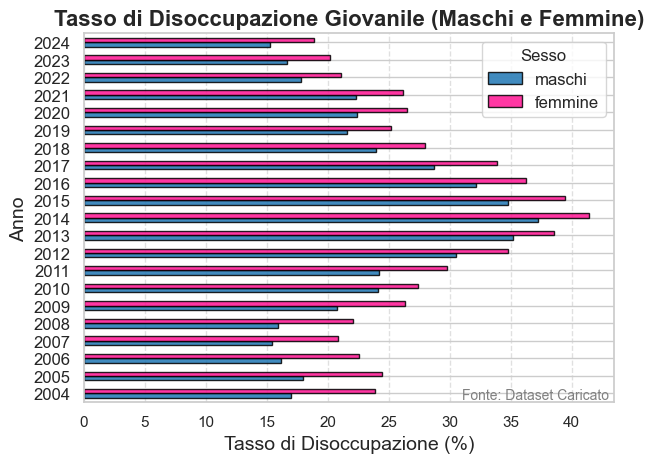

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv'  # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Rimuovere la colonna del totale se presente
pivot_combined_data = pivot_combined_data[['maschi', 'femmine']]  # Se ci fosse una colonna "Totale", la rimuoviamo

# Creare il grafico a barre separate con gli assi invertiti
plt.figure(figsize=(14, 7))

# Generare le barre per ogni gruppo separato (maschi e femmine)
pivot_combined_data.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff1493'], alpha=0.85, edgecolor='black')

# Titolo e etichette
plt.title('Tasso di Disoccupazione Giovanile (Maschi e Femmine)', fontsize=16, fontweight='bold')
plt.xlabel('Tasso di Disoccupazione (%)', fontsize=14)
plt.ylabel('Anno', fontsize=14)
plt.yticks(rotation=0, fontsize=12)

# Legenda
plt.legend(title='Sesso', fontsize=12, loc='upper right')

# Griglia
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Fonte: Dataset Caricato', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


Regioni senza dati di disoccupazione (NaN): []


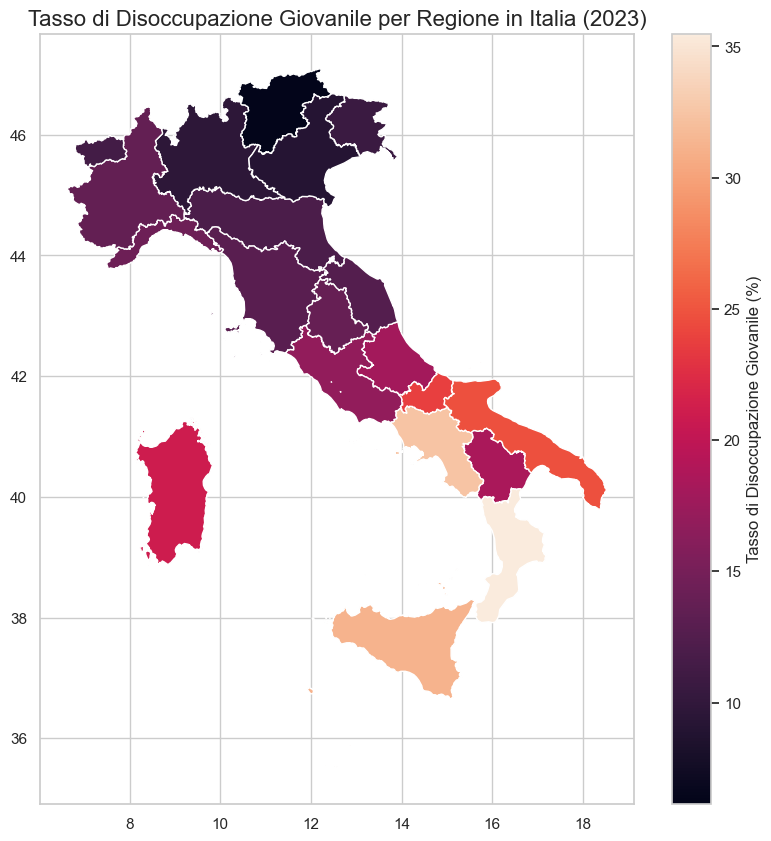

In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il CSV con i tassi di disoccupazione
file_path = 'disoccupazione regioni.csv'  # Sostituisci con il percorso del tuo CSV
df = pd.read_csv(file_path)



# Pulisci i nomi delle regioni nel CSV (rimuovi spazi extra e converte tutto in minuscolo)
df['Territorio'] = df['Territorio'].str.strip().str.lower()



# Filtra per l'anno 2023, per il sesso "totale" e per la classe di età "15-29 anni" (giovani)
df_2023 = df[(df['TIME'] == 2023) & (df['SEXISTAT1'] == 9) & (df['ETA1'] == 'Y15-29')]



# Mantieni solo le colonne rilevanti
df_2023 = df_2023[['Territorio', 'Value']]


# Carica il file GeoJSON delle regioni italiane
geojson_path = 'italy-with-regions_1458.geojson'  # Sostituisci con il percorso del tuo GeoJSON
gdf = gpd.read_file(geojson_path)

# Pulisci i nomi delle regioni nel GeoDataFrame (rimuovi spazi extra e converte tutto in minuscolo)
gdf['name'] = gdf['name'].str.strip().str.lower()

# Mappa manualmente i nomi delle regioni che hanno nomi diversi tra il CSV e il GeoJSON
region_mapping = {
    'friuli-venezia giulia': 'friuli venezia giulia',
    'trentino alto adige / südtirol' : 'trentino-alto adige/sudtirol',
    "valle d'aosta / vallée d'aoste" : "valle d'aosta",
}

# Applica la mappatura manuale
df_2023['Territorio'] = df_2023['Territorio'].replace(region_mapping)

# Mappa i tassi di disoccupazione alle regioni italiane
gdf['disoccupazione'] = gdf['name'].map(lambda x: df_2023[df_2023['Territorio'] == x]['Value'].values[0] if x in df_2023['Territorio'].values else None)



# Verifica se ci sono NaN nei tassi di disoccupazione
print("Regioni senza dati di disoccupazione (NaN):", gdf[gdf['disoccupazione'].isna()]['name'].unique())

# Rimuovi le regioni senza dati di disoccupazione (NaN)
gdf = gdf.dropna(subset=['disoccupazione'])

# Crea la mappa coropletica
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Crea la mappa coropletica
gdf.plot(column='disoccupazione', ax=ax, legend=True,
         legend_kwds={'label': "Tasso di Disoccupazione Giovanile (%)",
                      'orientation': "vertical"})

# Titolo della mappa
ax.set_title('Tasso di Disoccupazione Giovanile per Regione in Italia (2023)', fontsize=16)

# Mostra la mappa
plt.show()


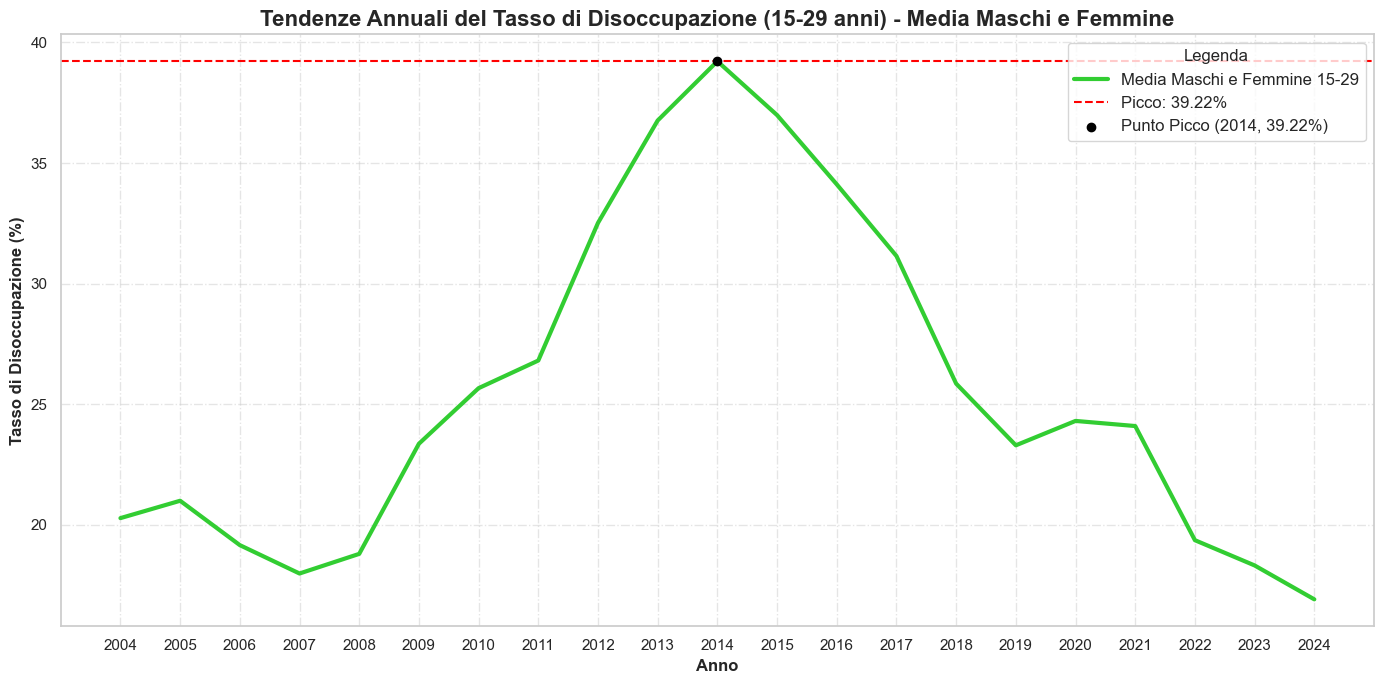

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usa un tema più esteticamente gradevole
sns.set_theme(style="whitegrid")

# Caricare i dati (modifica i percorsi dei file)
file_path_15_24 = 'disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = 'disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
# Per il dataset 15-24 anni, possiamo usare i dati così come sono
# Per il dataset 18-29 anni, calcoliamo la media tra i 18-24 anni (inclusi)

# Gruppo 18-24 anni per dataset 18-29 (media dei dati)
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between('2018', '2024')]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Calcolare la media tra maschi e femmine per ogni anno
pivot_combined_data['Media'] = pivot_combined_data.mean(axis=1)

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linea per la media tra maschi e femmine per il periodo 15-29 anni
sns.lineplot(data=pivot_combined_data['Media'], label='Media Maschi e Femmine 15-29', color='#32CD32', linewidth=3)

# Aggiungi una linea orizzontale tratteggiata per evidenziare il picco
picco = pivot_combined_data['Media'].max()  # Identifica il valore massimo come picco
picco_anno = pivot_combined_data['Media'].idxmax()  # Trova l'anno corrispondente al picco

# Aggiungi la linea orizzontale tratteggiata
plt.axhline(y=picco, color='red', linestyle='--', label=f'Picco: {picco:.2f}%')

# Aggiungi un punto sul picco
plt.scatter(picco_anno, picco, color='black', zorder=5, label=f'Punto Picco ({picco_anno}, {picco:.2f}%)')

# Aggiungi titolo e etichette
plt.title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni) - Media Maschi e Femmine', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Anno', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Miglioramento della leggibilità con griglie
plt.grid(True, linestyle='dashdot', alpha=0.5)

# Legenda
plt.legend(title='Legenda', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Mostrare il grafico
plt.show()

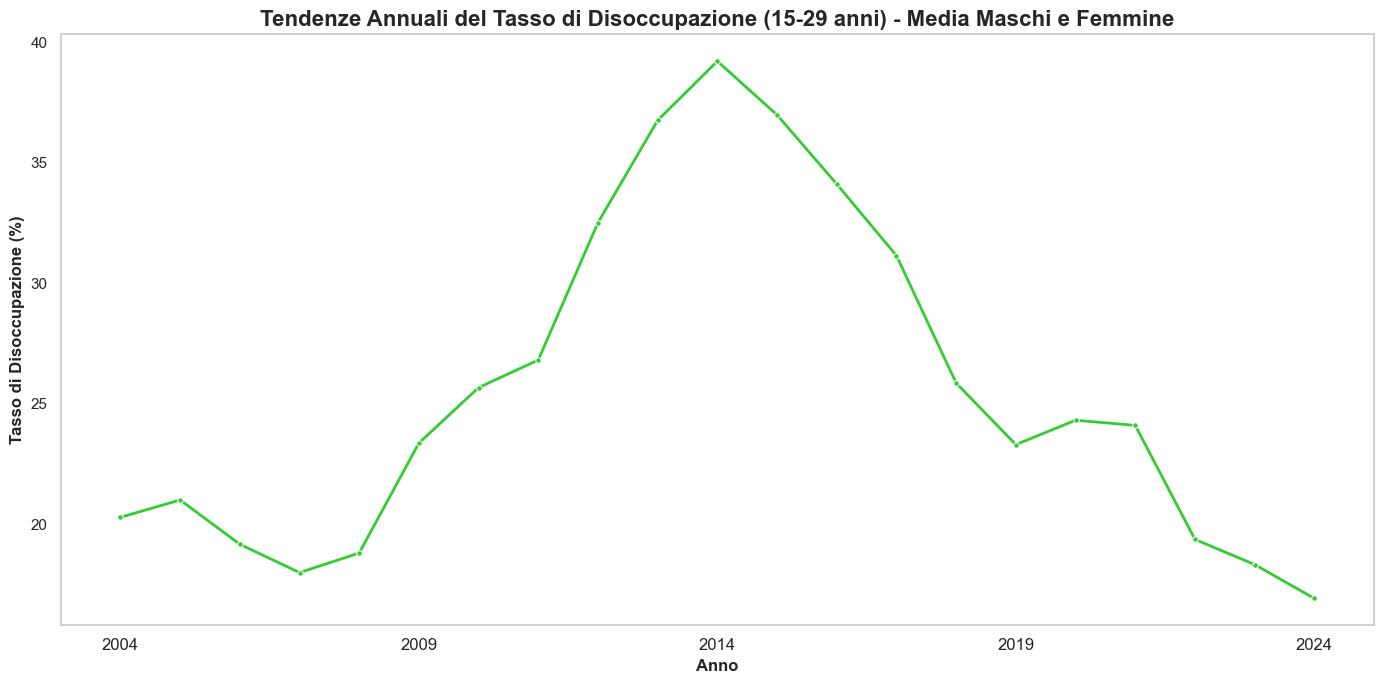

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usa un tema più esteticamente gradevole
sns.set_theme(style="whitegrid")

# Caricare i dati (modifica i percorsi dei file)
file_path_15_24 = 'disoccupazione giovanile 15-24.csv'  # Sostituisci con il percorso del primo file
file_path_18_29 = 'disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Calcolare la media tra maschi e femmine per ogni anno
pivot_combined_data['Media'] = pivot_combined_data.mean(axis=1)

# Creare un dataset con i dati combinati
combined_dataset = aggregated_combined_data.copy()

# Salvare il dataset in un file CSV
combined_dataset.to_csv('combined_unemployment_dataIT.csv', index=False)

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Creare una linea continua per la media, con punti per ogni anno
sns.lineplot(data=pivot_combined_data['Media'], label=None, color='#32CD32', linewidth=2, marker='o', markersize=4)

# Aggiungi titolo e etichette
plt.title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni) - Media Maschi e Femmine', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Anno', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Impostare le etichette dell'asse x ogni 5 anni, dal 2004 al 2024
xticks = [str(year) for year in range(2004, 2025, 5)]
xticks_pos = [str(year) for year in range(2004, 2025, 5)]

plt.xticks(ticks=xticks_pos, labels=xticks, fontsize=12)

# Rimuovere la griglia dietro il grafico
plt.grid(False)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Mostrare il grafico
plt.show()


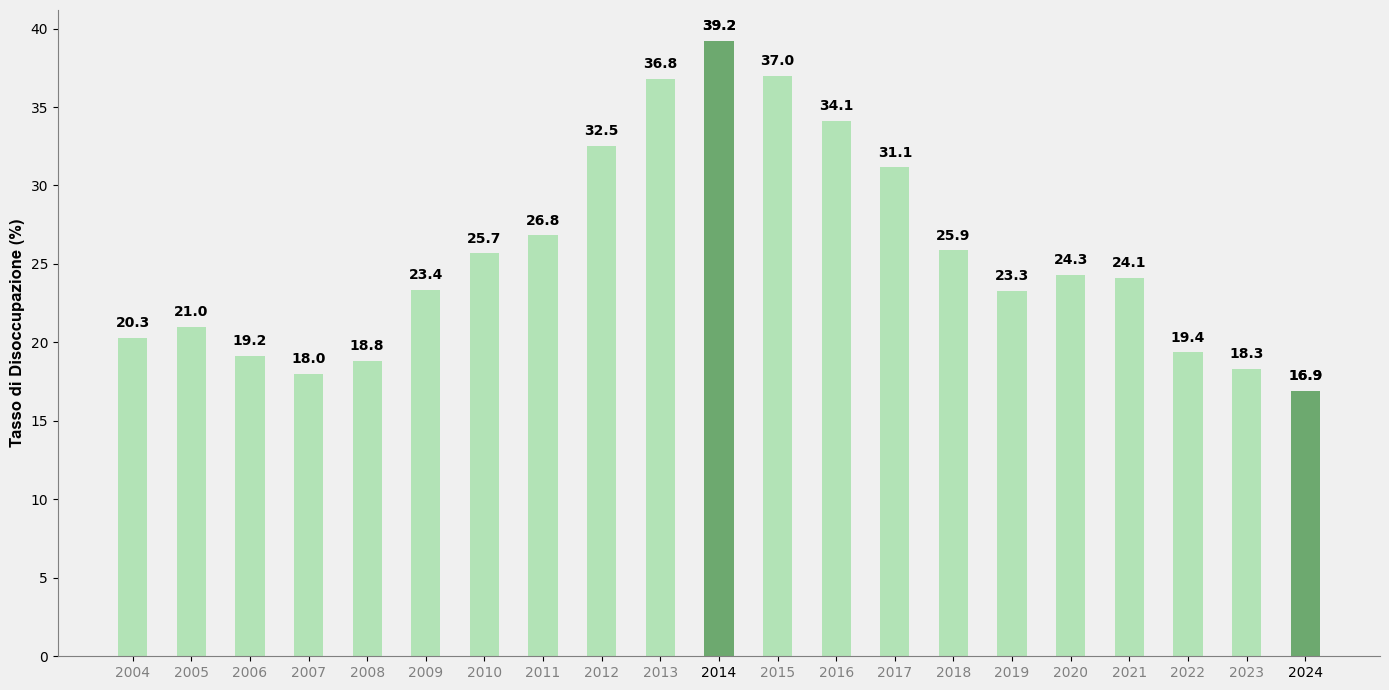

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricare i dati (modifica i percorsi dei file)
file_path_15_24 = 'disoccupazione giovanile 15-24.csv'  # Sostituisci con il percorso del primo file
file_path_18_29 = 'disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Calcolare la media tra maschi e femmine per ogni anno
pivot_combined_data['Media'] = pivot_combined_data.mean(axis=1)

# Creare il grafico a barre
fig, ax = plt.subplots(figsize=(14, 7))

# Impostare lo sfondo dell'intera figura su bianco
fig.patch.set_facecolor('#F0F0F0')  # Impostiamo il colore di sfondo del grafico

# Impostiamo lo sfondo del grafico su bianco
ax.set_facecolor('#F0F0F0')

# Colore per la barra del 2014 e 2024 più scura
colors = ['#B2E3B6' if year != '2014' and year != '2024' else '#6DA96F' for year in pivot_combined_data.index]

# Creare il grafico a barre con la barra del 2014 e 2024 più scura
bars = ax.bar(pivot_combined_data.index, pivot_combined_data['Media'], color=colors, width=0.5)

#Aggiungere il valore sopra le barre per il 2014 e il 2024
for i, bar in enumerate(bars):
    year = pivot_combined_data.index[i]
    if year in ['2014', '2024']:
        height = bar.get_height()
        ax.text(i, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

for i, bar in enumerate(bars):
    year = pivot_combined_data.index[i]
    if year in year:
        height = bar.get_height()
        ax.text(i, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Rimuovere assi superflui
ax.spines['top'].set_visible(False)    # Rimuove l'asse superiore
ax.spines['right'].set_visible(False)  # Rimuove l'asse destro

# Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
ax.spines['bottom'].set_color('gray')  # Colore asse inferiore
ax.spines['left'].set_color('gray')    # Colore asse sinistro

# Personalizzare le etichette
#ax.set_title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni)', fontsize=16, fontweight='bold', family='Arial')
ax.set_xlabel('')
ax.set_ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Sistemare le etichette dell'asse x
ax.set_xticks(range(len(pivot_combined_data.index)))
ax.set_xticklabels(pivot_combined_data.index, fontsize=10)

# metti etichetta solo del 2014 e 2024 nera
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() in ['2014', '2024']:
        label.set_color('black')
    else:
        label.set_color('gray')

# Rimuovere la griglia
ax.grid(False)

# Mostrare il grafico
plt.tight_layout()
plt.show()


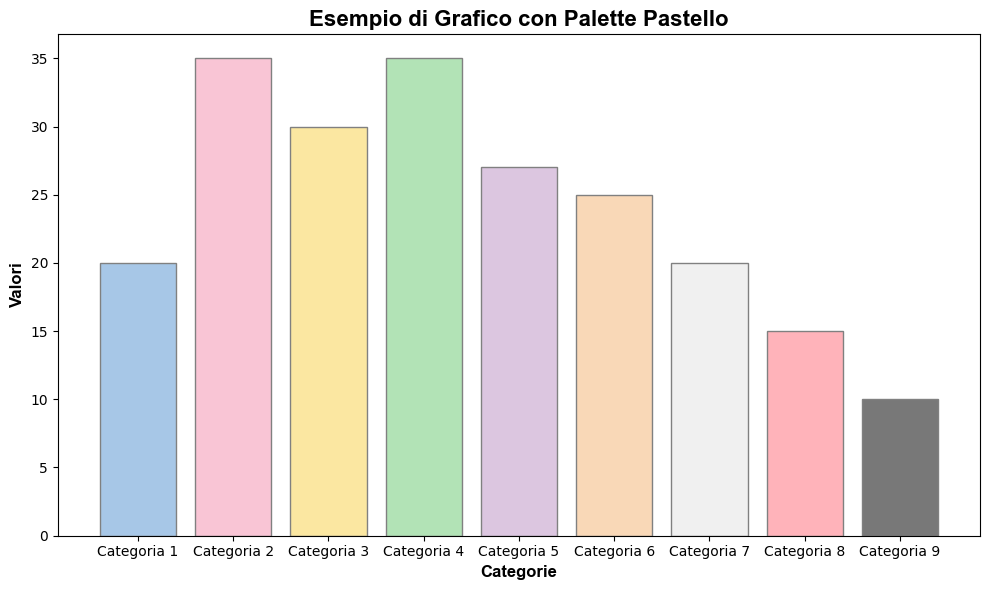

In [99]:
import matplotlib.pyplot as plt

# Palette di colori pastello
pastel_colors = ['#A7C7E7', '#F9C5D5', '#FBE7A1', '#B2E3B6', '#DCC6E0', '#F9D8B7', '#F0F0F0', '#FFB3BA', '#787878']

# Dati di esempio
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4', 'Categoria 5', 'Categoria 6', 'Categoria 7', 'Categoria 8', 'Categoria 9']
values = [20, 35, 30, 35, 27, 25, 20, 15, 10]

# Creare il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=pastel_colors, edgecolor='gray')

# Aggiungere titolo e etichette
plt.title('Esempio di Grafico con Palette Pastello', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Categorie', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Valori', fontsize=12, fontweight='bold', family='Arial')

# Mostrare il grafico
plt.tight_layout()
plt.show()


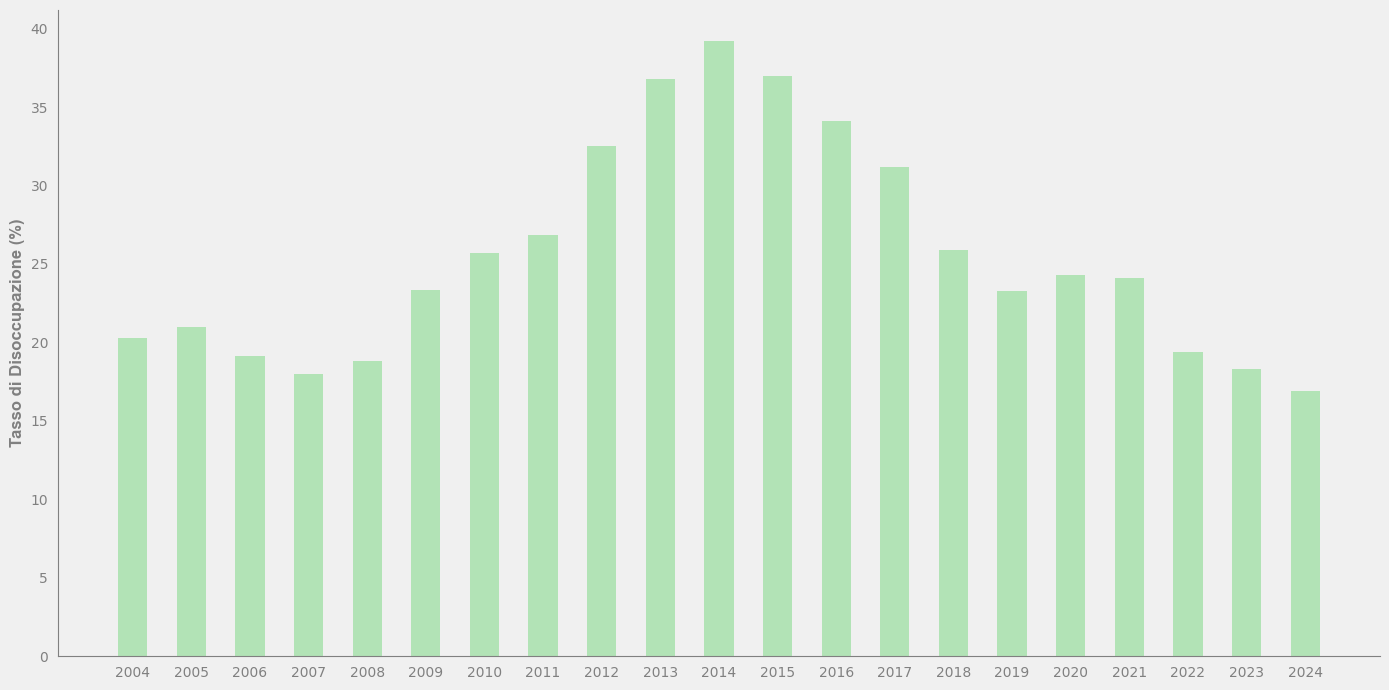

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricare i dati (modifica i percorsi dei file)
file_path_15_24 = 'disoccupazione giovanile 15-24.csv'  # Sostituisci con il percorso del primo file
file_path_18_29 = 'disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Calcolare la media tra maschi e femmine per ogni anno
pivot_combined_data['Media'] = pivot_combined_data.mean(axis=1)

# Creare il grafico a barre
fig, ax = plt.subplots(figsize=(14, 7))

# Impostare lo sfondo dell'intera figura su bianco
fig.patch.set_facecolor('#F0F0F0')

# Impostare lo sfondo del grafico su bianco
ax.set_facecolor('#F0F0F0')

# Colore per la barra del 2014 e 2024 più scura
colors = ['#B2E3B6' ]

# Creare il grafico a barre
bars = ax.bar(pivot_combined_data.index, pivot_combined_data['Media'], color=colors, width=0.5)


# Personalizzare i tick dell'asse X
ax.tick_params(axis='x', which='both', bottom=False, top=False, color='gray')

# Rimuovere le stanghette dai tick dell'asse Y
ax.tick_params(axis='y', which='both', left=False, color='gray', labelcolor='gray') 

# Personalizzare le etichette
ax.set_xlabel('')
ax.set_ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial', color='gray')

# Rimuovere assi superflui
ax.spines['top'].set_visible(False)    # Rimuove l'asse superiore
ax.spines['right'].set_visible(False)  # Rimuove l'asse destro

# Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
ax.spines['bottom'].set_color('gray')  # Colore asse inferiore
ax.spines['left'].set_color('gray')    # Colore asse sinistro

# Sistemare le etichette dell'asse x
ax.set_xticks(range(len(pivot_combined_data.index)))
ax.set_xticklabels(pivot_combined_data.index, fontsize=10)

# Mettere etichette del 2014 e 2024 nere, le altre grigie
for i, label in enumerate(ax.get_xticklabels()):
        label.set_color('gray')

# Rimuovere la griglia
ax.grid(False)

# Mostrare il grafico
plt.tight_layout()
plt.show()


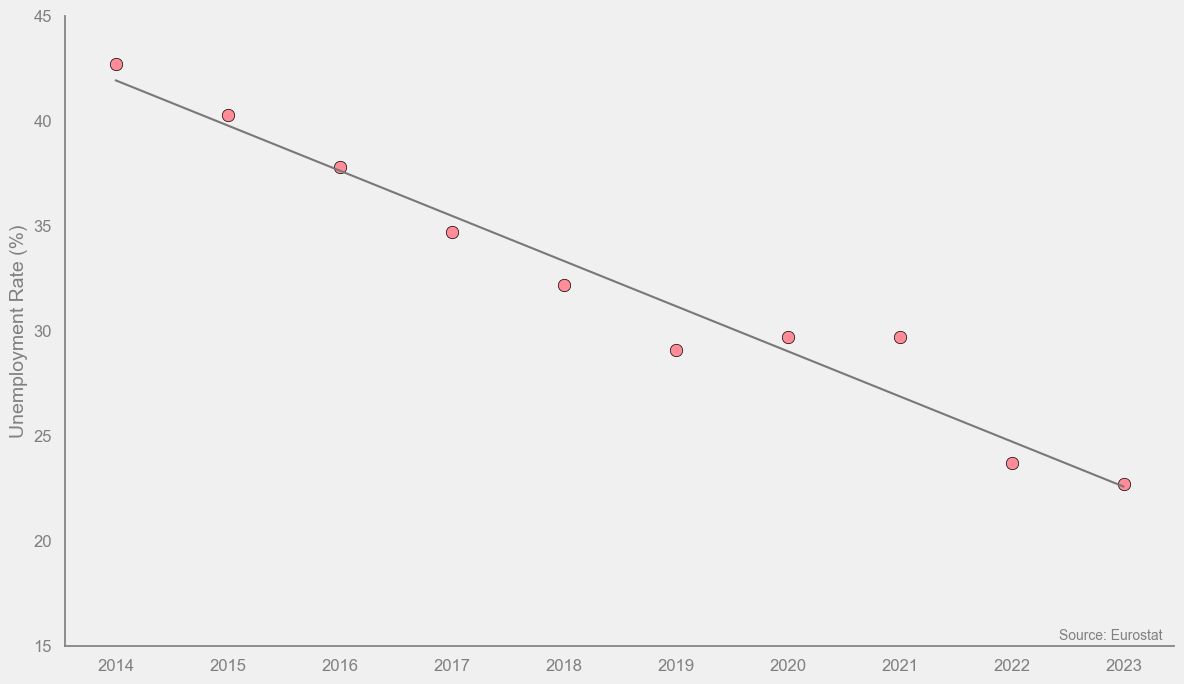

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Configurazione del grafico
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Scatter plot
plt.scatter(years, italy, color='#FF8C96', s=80, label='Italy Youth Unemployment (%)', edgecolor='black', linewidth=0.5)

# Linea di tendenza (opzionale)
z = np.polyfit(years, italy, 1)
p = np.poly1d(z)
plt.plot(years, p(years), color='#787878', label='Trend Line')  # Linea continua



# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Titolo e descrizione
plt.title('')
plt.xlabel('')
plt.ylabel('Unemployment Rate (%)', fontsize=14, color='gray')

# Personalizzazione degli assi
plt.xticks(years, fontsize=12, color='gray')
plt.yticks(range(15, 50, 5), fontsize=12, color='gray')
plt.ylim(15, 45)

# Griglia e legenda
plt.grid(visible=True, linestyle='-', alpha=0.6)


# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

# Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Rimuovere la griglia
plt.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()


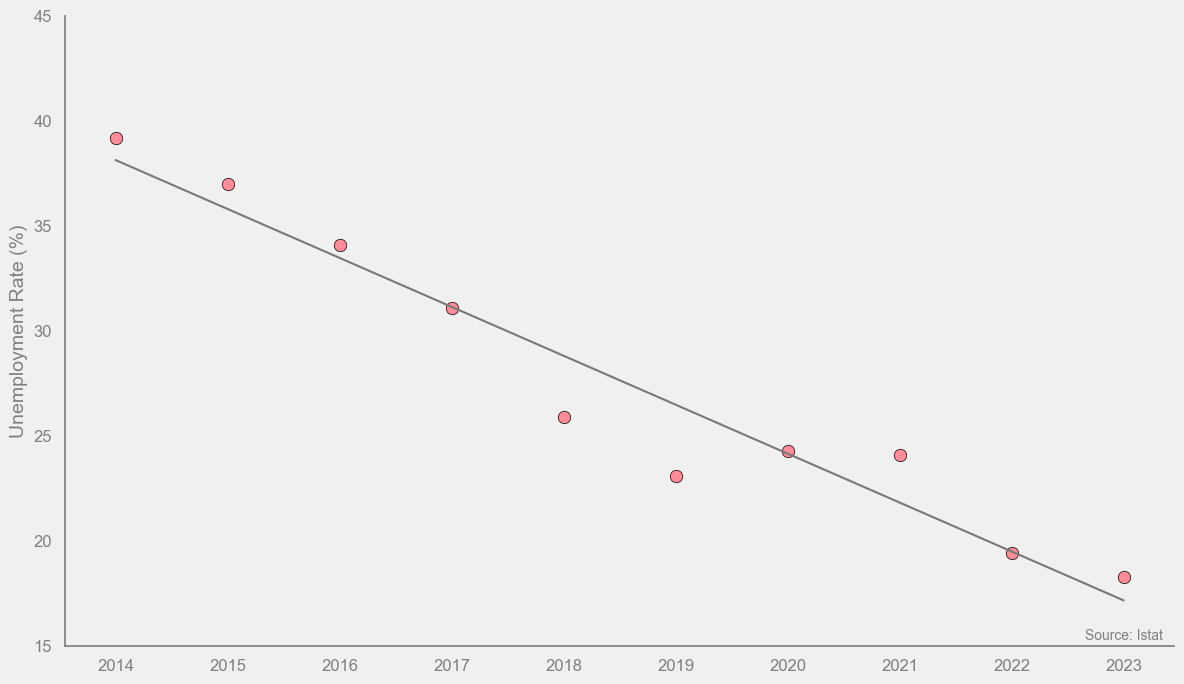

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
italy = [39.2, 37.0, 34.1, 31.1, 25.9, 23.1, 24.3, 24.1, 19.4, 18.3]

# Configurazione del grafico
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Scatter plot
plt.scatter(years, italy, color='#FF8C96', s=80, label='Italy Youth Unemployment (%)', edgecolor='black', linewidth=0.5)

# Linea di tendenza (opzionale)
z = np.polyfit(years, italy, 1)
p = np.poly1d(z)
plt.plot(years, p(years), color='#787878', label='Trend Line')  # Linea continua



# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Titolo e descrizione
plt.title('')
plt.xlabel('')
plt.ylabel('Unemployment Rate (%)', fontsize=14, color='gray')

# Personalizzazione degli assi
plt.xticks(years, fontsize=12, color='gray')
plt.yticks(range(15, 50, 5), fontsize=12, color='gray')
plt.ylim(15, 45)

# Griglia e legenda
plt.grid(visible=True, linestyle='-', alpha=0.6)


# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

# Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro

# Firma del grafico
plt.annotate('Source: Istat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Rimuovere la griglia
plt.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()


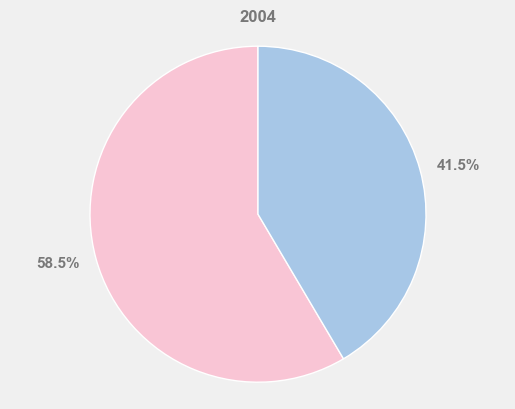

In [103]:
import matplotlib.pyplot as plt

# Percentuali di disoccupazione
femmine_disoccupate = 23.895655633333334  # Percentuale di femmine sul totale dei disoccupati
maschi_disoccupati = 16.952255166666667  # Percentuale di maschi sul totale dei disoccupati
totale_disoccupati = 19.997946633333335  # Percentuale di disoccupati sul totale della popolazione

# Calcolare la somma di disoccupati maschi e femmine per ottenere il totale dei disoccupati
totale_disoccupati_calcolato = femmine_disoccupate + maschi_disoccupati

# Calcolare le percentuali relative di maschi e femmine rispetto al totale dei disoccupati
percentuale_femmine = (femmine_disoccupate / totale_disoccupati_calcolato) * 100
percentuale_maschi = (maschi_disoccupati / totale_disoccupati_calcolato) * 100

# Etichette con le percentuali
labels = [f'{percentuale_femmine:.1f}%', f'{percentuale_maschi:.1f}%']
sizes = [percentuale_femmine, percentuale_maschi]
colors = ['#F9C5D5', '#A7C7E7']

# Creazione del grafico a torta
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, startangle=90, textprops={'color': '#787878', 'fontweight': 'bold', 'family': 'Arial'})

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

# Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro

# Titolo del grafico
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("2004", color='#787878', fontweight='bold', family='Arial')

# Visualizza il grafico
plt.show()


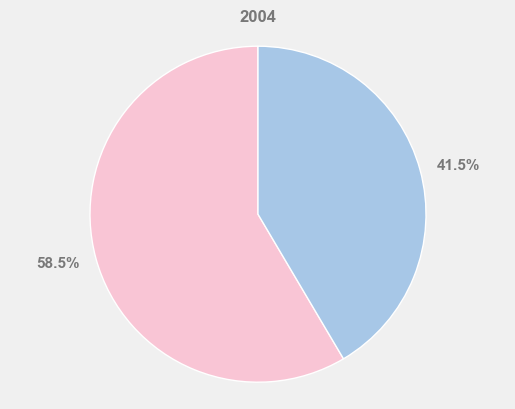

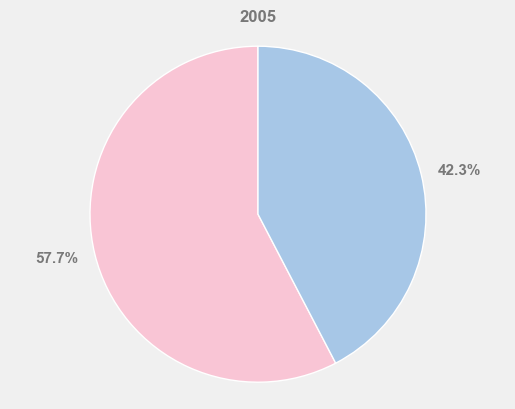

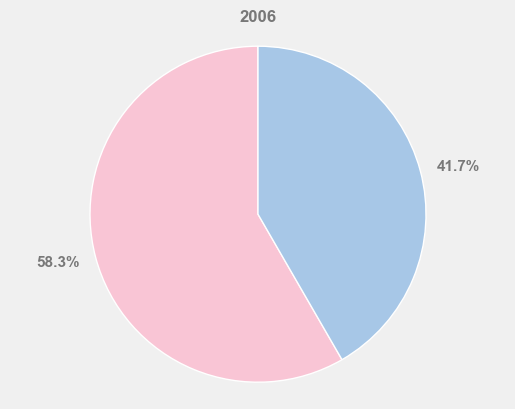

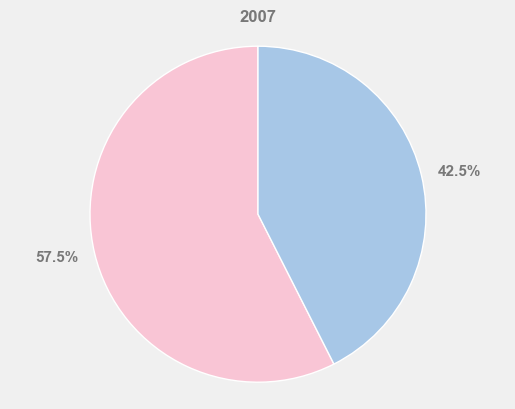

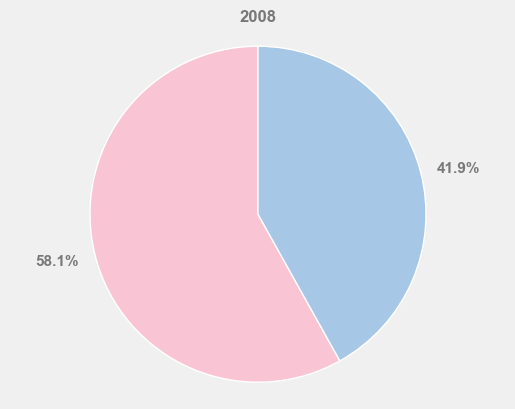

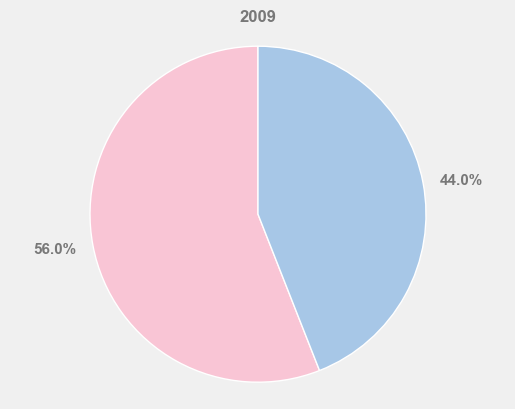

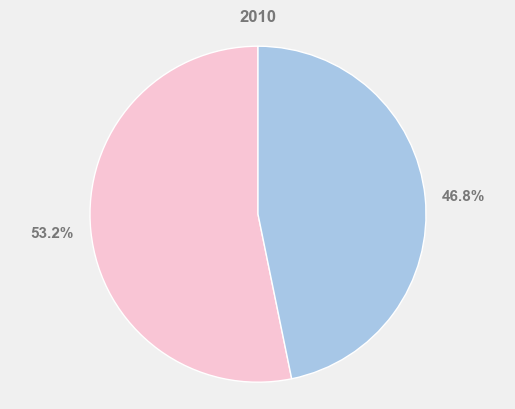

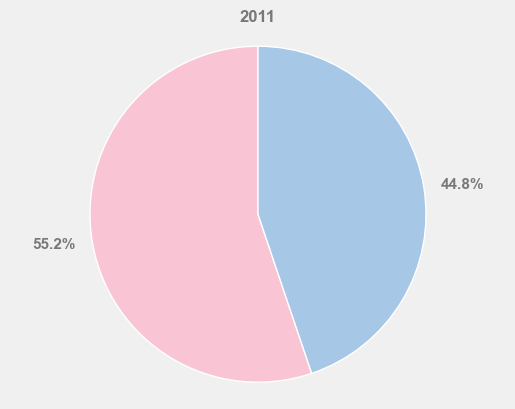

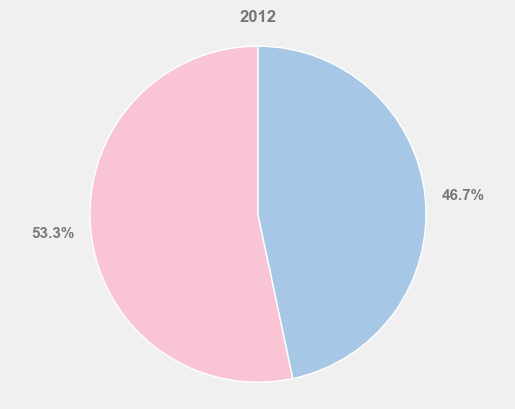

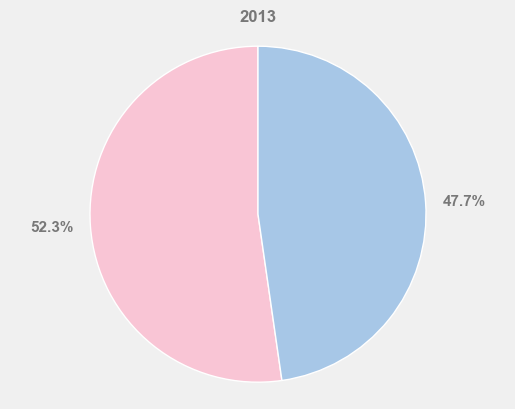

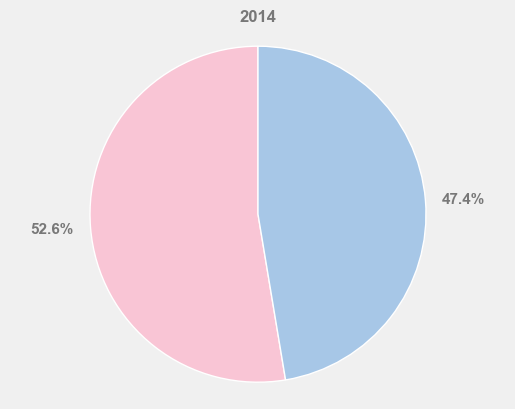

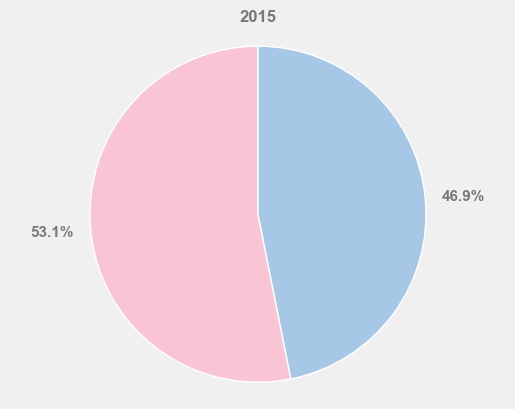

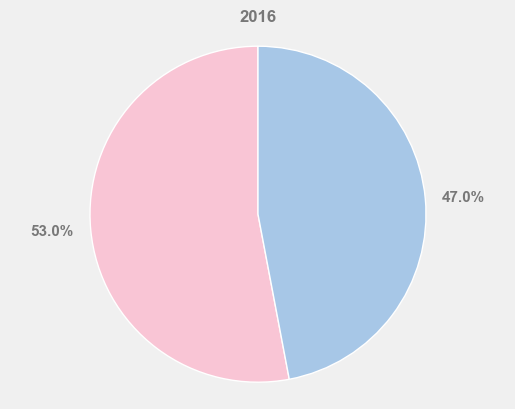

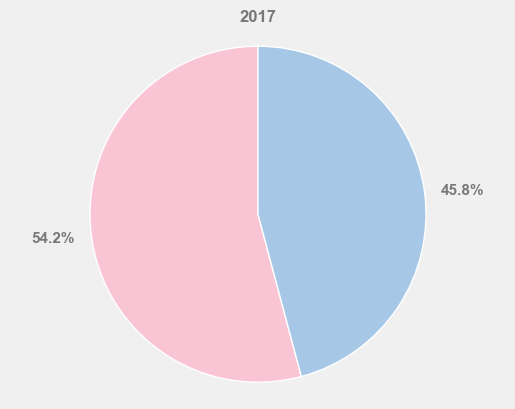

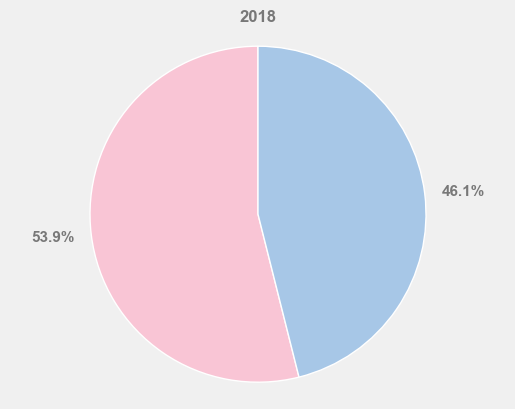

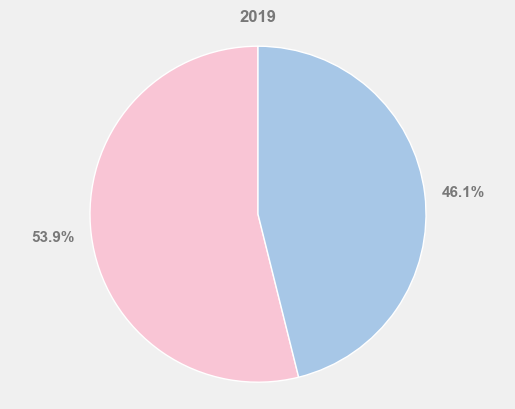

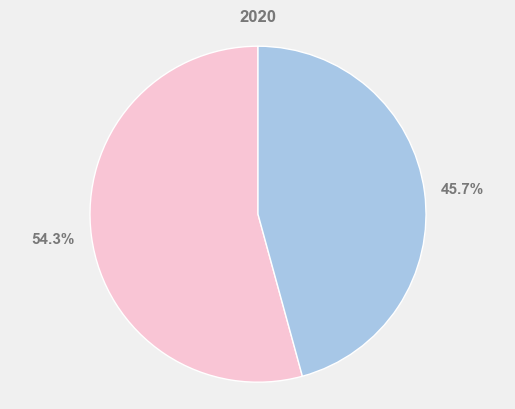

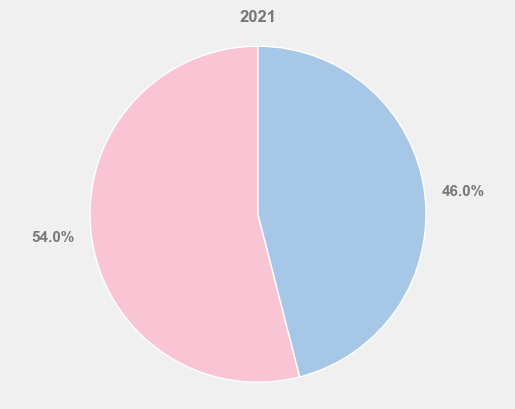

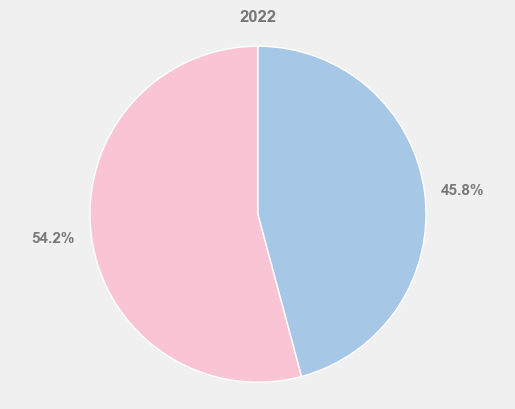

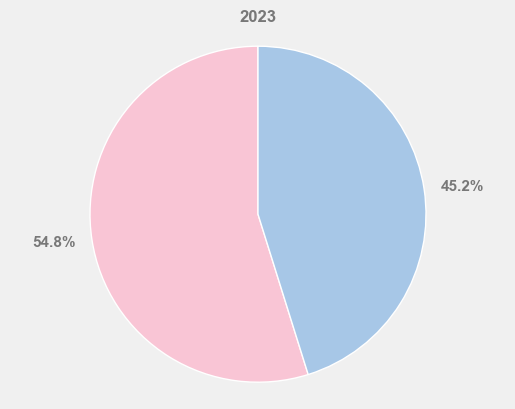

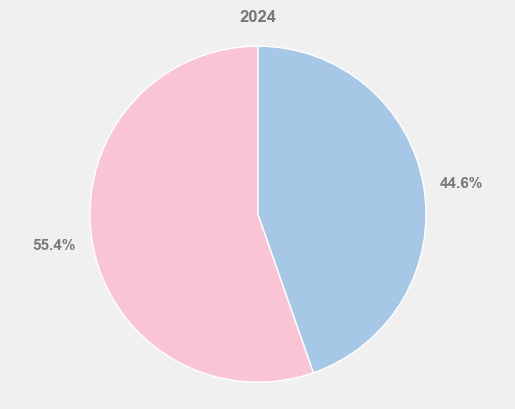

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('combined_unemployment_dataIT.csv')

# Lista di anni unici
anni = df['Anno'].unique()

# Ciclo su ogni anno e crea un grafico a torta
for anno in anni:
    # Filtra il dataframe per l'anno specifico
    df_anno = df[df['Anno'] == anno]
    
    # Ottieni le percentuali per femmine, maschi e totale
    femmine_disoccupate = df_anno[df_anno['Sesso'] == 'femmine']['Value'].values[0]
    maschi_disoccupati = df_anno[df_anno['Sesso'] == 'maschi']['Value'].values[0]
    totale_disoccupati = df_anno[df_anno['Sesso'] == 'totale']['Value'].values[0]
    
    # Calcolare la somma di disoccupati maschi e femmine per ottenere il totale dei disoccupati
    totale_disoccupati_calcolato = femmine_disoccupate + maschi_disoccupati
    
    # Calcolare le percentuali relative di maschi e femmine rispetto al totale dei disoccupati
    percentuale_femmine = (femmine_disoccupate / totale_disoccupati_calcolato) * 100
    percentuale_maschi = (maschi_disoccupati / totale_disoccupati_calcolato) * 100
    
    # Etichette con le percentuali
    labels = [f'{percentuale_femmine:.1f}%', f'{percentuale_maschi:.1f}%']
    sizes = [percentuale_femmine, percentuale_maschi]
    colors = ['#F9C5D5', '#A7C7E7']
    
    # Creazione del grafico a torta
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, colors=colors, startangle=90, textprops={'color': '#787878', 'fontweight': 'bold', 'family': 'Arial'})
    
    # Impostare lo sfondo del grafico su grigiopastello
    plt.gca().set_facecolor('#F0F0F0')
    
    # Impostare lo sfondo dell'intera figura su grigiopastello
    plt.gcf().patch.set_facecolor('#F0F0F0')
    
    # Rimuovere assi superflui
    plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
    plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro
    
    # Aggiungere colore bianco per assi rimossi (opzionale ma garantisce pulizia)
    plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
    plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro
    
    # Titolo del grafico
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"{anno}", color='#787878', fontweight='bold', family='Arial')
    
    # Visualizza il grafico
    plt.show()


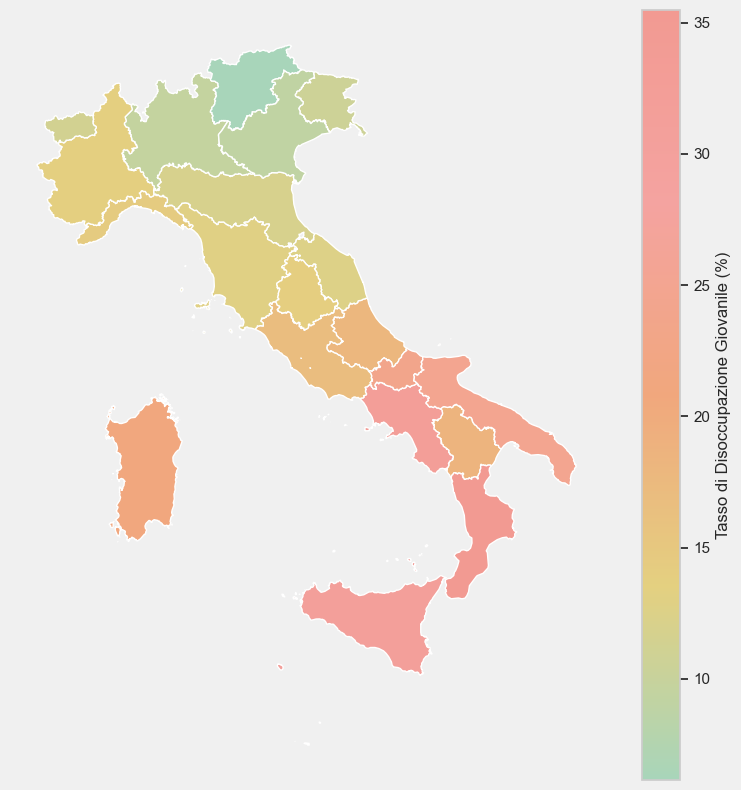

In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Carica il CSV con i tassi di disoccupazione
file_path = 'disoccupazione regioni.csv'  # Sostituisci con il percorso del tuo CSV
df = pd.read_csv(file_path)

# Pulisci i nomi delle regioni nel CSV (rimuovi spazi extra e converte tutto in minuscolo)
df['Territorio'] = df['Territorio'].str.strip().str.lower()

# Filtra per l'anno 2023, per il sesso "totale" e per la classe di età "15-29 anni" (giovani)
df_2023 = df[(df['TIME'] == 2023) & (df['SEXISTAT1'] == 9) & (df['ETA1'] == 'Y15-29')]

# Mantieni solo le colonne rilevanti
df_2023 = df_2023[['Territorio', 'Value']]

# Carica il file GeoJSON delle regioni italiane
geojson_path = 'italy-with-regions_1458.geojson'  # Sostituisci con il percorso del tuo GeoJSON
gdf = gpd.read_file(geojson_path)

# Pulisci i nomi delle regioni nel GeoDataFrame (rimuovi spazi extra e converte tutto in minuscolo)
gdf['name'] = gdf['name'].str.strip().str.lower()

# Mappa manualmente i nomi delle regioni che hanno nomi diversi tra il CSV e il GeoJSON
region_mapping = {
    'friuli-venezia giulia': 'friuli venezia giulia',
    'trentino alto adige / südtirol' : 'trentino-alto adige/sudtirol',
    "valle d'aosta / vallée d'aoste" : "valle d'aosta",
}

# Applica la mappatura manuale
df_2023['Territorio'] = df_2023['Territorio'].replace(region_mapping)

# Mappa i tassi di disoccupazione alle regioni italiane
gdf['disoccupazione'] = gdf['name'].map(lambda x: df_2023[df_2023['Territorio'] == x]['Value'].values[0] if x in df_2023['Territorio'].values else None)

# Verifica se ci sono NaN nei tassi di disoccupazione
# print("Regioni senza dati di disoccupazione (NaN):", gdf[gdf['disoccupazione'].isna()]['name'].unique())

# Rimuovi le regioni senza dati di disoccupazione (NaN)
gdf = gdf.dropna(subset=['disoccupazione'])

# Definisci una palette di colori pastello che va dal verde al rosso
colors = [
    "#A8D5BA",  # verde chiaro
    "#E4D080",  # verde pastello
    "#F1A77D",  # giallo pastello (transizione)
    "#F4A3A0",  # rosa pastello
    "#F29A92",  # rosso pastello
]

# Crea una colormap personalizzata
cmap = LinearSegmentedColormap.from_list("verde_a_rosso", colors)

# Crea la mappa coropletica
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Crea la mappa coropletica con la palette personalizzata
gdf.plot(column='disoccupazione', ax=ax, legend=True,
         cmap=cmap,  # Usa la palette personalizzata
        legend_kwds={'label': "Tasso di Disoccupazione Giovanile (%)",
                              'orientation': "vertical"})

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro
plt.gca().spines['bottom'].set_visible(False)  # Rimuove l'asse inferiore
plt.gca().spines['left'].set_visible(False)  # Rimuove l'asse sinistro

# Titolo della mappa
# ax.set_title('Tasso di Disoccupazione Giovanile per Regione in Italia (2023)', fontsize=16)

#rimuovi etichette degli assi
plt.xticks([])
plt.yticks([])

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere la griglia
plt.grid(False)
# Mostra la mappa
plt.show()


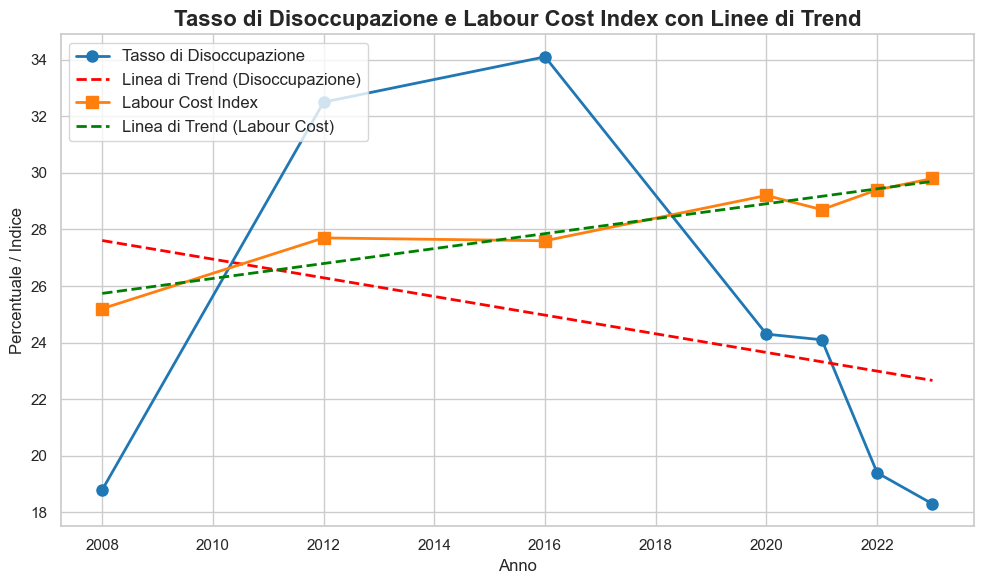

In [106]:
import matplotlib.pyplot as plt

# Dati
years = [2008, 2012, 2016, 2020, 2021, 2022, 2023]
labour_cost_index = [25.2, 27.7, 27.6, 29.2, 28.7, 29.4, 29.8]
unemployment_rate = [18.8, 32.5, 34.1, 24.3, 24.1, 19.4, 18.3]
#costo_lavoratore = [7, 7.8, 7.7, 8.2, 8, 8.2, 8.3]



# Calcolare la linea di trend per il tasso di disoccupazione (unemployment_rate)
coefficients_unemployment = np.polyfit(years, unemployment_rate, 1)  # Grado 1 per una retta
trend_line_unemployment = np.polyval(coefficients_unemployment, years)

# Calcolare la linea di trend per il Labour Cost Index
coefficients_labour_cost = np.polyfit(years, labour_cost_index, 1)  # Grado 1 per una retta
trend_line_labour_cost = np.polyval(coefficients_labour_cost, years)

# Crea il grafico
plt.figure(figsize=(10, 6))

# Traccia i dati originali per il tasso di disoccupazione
plt.plot(years, unemployment_rate, label='Tasso di Disoccupazione', marker='o', color='#1f77b4', linestyle='-', linewidth=2, markersize=8)

# Traccia la linea di trend per il tasso di disoccupazione
plt.plot(years, trend_line_unemployment, label='Linea di Trend (Disoccupazione)', color='red', linestyle='--', linewidth=2)

# Traccia i dati originali per il Labour Cost Index
plt.plot(years, labour_cost_index, label='Labour Cost Index', marker='s', color='#ff7f0e', linestyle='-', linewidth=2, markersize=8)

# Traccia la linea di trend per il Labour Cost Index
plt.plot(years, trend_line_labour_cost, label='Linea di Trend (Labour Cost)', color='green', linestyle='--', linewidth=2)

# Aggiungi etichette e titolo
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Percentuale / Indice', fontsize=12)
plt.title('Tasso di Disoccupazione e Labour Cost Index con Linee di Trend', fontsize=16, fontweight='bold')

# Aggiungi legenda
plt.legend(loc='upper left', fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()




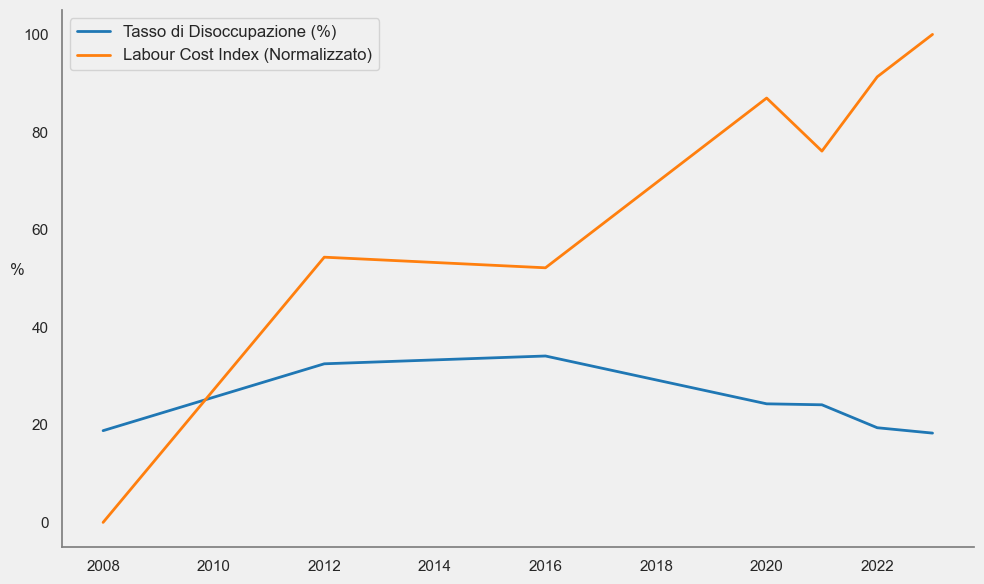

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
years = [2008, 2012, 2016, 2020, 2021, 2022, 2023]
labour_cost_index = [25.2, 27.7, 27.6, 29.2, 28.7, 29.4, 29.8]
unemployment_rate = [18.8, 32.5, 34.1, 24.3, 24.1, 19.4, 18.3]

# Normalizzare i dati LCI per farli rientrare nella stessa scala del tasso di disoccupazione
labour_cost_index_normalized = [(x - min(labour_cost_index)) / (max(labour_cost_index) - min(labour_cost_index)) * 100 for x in labour_cost_index]

# Crea il grafico
plt.figure(figsize=(10, 6))

# Traccia i dati originali per il tasso di disoccupazione
plt.plot(years, unemployment_rate, label='Tasso di Disoccupazione (%)',  color='#1f77b4', linestyle='-', linewidth=2, markersize=8)

# Traccia i dati normalizzati per il Labour Cost Index
plt.plot(years, labour_cost_index_normalized, label='Labour Cost Index (Normalizzato)',  color='#ff7f0e', linestyle='-', linewidth=2, markersize=8)

# Aggiungi etichette e titolo
plt.xlabel('')
plt.ylabel('%', fontsize=12, rotation=0)
#plt.title('Tasso di Disoccupazione e Labour Cost Index Normalizzati', fontsize=16, fontweight='bold')

# Aggiungi legenda
plt.legend(loc='upper left', fontsize=12, facecolor='#F0F0F0')


# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro


plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')   # Colore asse sinistro


# Rimuovere la griglia
plt.grid(False)
# Mostra il grafico
plt.tight_layout()
plt.show()


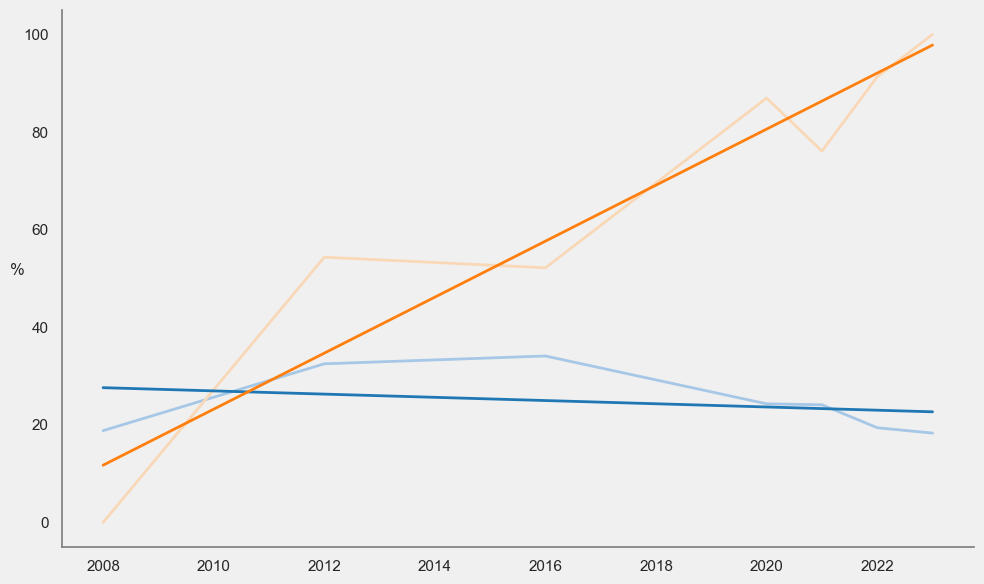

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
years = [2008, 2012, 2016, 2020, 2021, 2022, 2023]
labour_cost_index = [25.2, 27.7, 27.6, 29.2, 28.7, 29.4, 29.8]
unemployment_rate = [18.8, 32.5, 34.1, 24.3, 24.1, 19.4, 18.3]

# Normalizzare i dati LCI per farli rientrare nella stessa scala del tasso di disoccupazione
labour_cost_index_normalized = [(x - min(labour_cost_index)) / (max(labour_cost_index) - min(labour_cost_index)) * 100 for x in labour_cost_index]

# Calcolare la linea di trend per il tasso di disoccupazione
coefficients_unemployment = np.polyfit(years, unemployment_rate, 1)  # Regressione lineare
trend_line_unemployment = np.polyval(coefficients_unemployment, years)

# Calcolare la linea di trend per il Labour Cost Index
coefficients_lci = np.polyfit(years, labour_cost_index_normalized, 1)  # Regressione lineare
trend_line_lci = np.polyval(coefficients_lci, years)

# Crea il grafico
plt.figure(figsize=(10, 6))

# Traccia i dati originali per il tasso di disoccupazione
plt.plot(years, unemployment_rate, label='Tasso di Disoccupazione (%)',  color='#A7C7E7', linestyle='-', linewidth=2, markersize=8)

# Traccia i dati normalizzati per il Labour Cost Index
plt.plot(years, labour_cost_index_normalized, label='Labour Cost Index (Normalizzato)',  color='#F9D8B7', linestyle='-', linewidth=2, markersize=8)

# Aggiungi le linee di trend
plt.plot(years, trend_line_unemployment, label='Linea di Trend (Disoccupazione)', color='#1f77b4', linestyle='-', linewidth=2)
plt.plot(years, trend_line_lci, label='Linea di Trend (Labour Cost Index)', color='#ff7f0e', linestyle='-', linewidth=2)

# Aggiungi etichette e titolo
plt.xlabel('', fontsize=12)
plt.ylabel('%', fontsize=12, rotation=0)
#plt.title('Tasso di Disoccupazione e Labour Cost Index Normalizzati', fontsize=16, fontweight='bold')

# Aggiungi legenda
#plt.legend(loc='upper left', fontsize=12, facecolor='#F0F0F0')

# Impostare lo sfondo del grafico su grigio pastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigio pastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro

# Rimuovere la griglia
plt.grid(False)

# Mostra il grafico
plt.tight_layout()
plt.show()


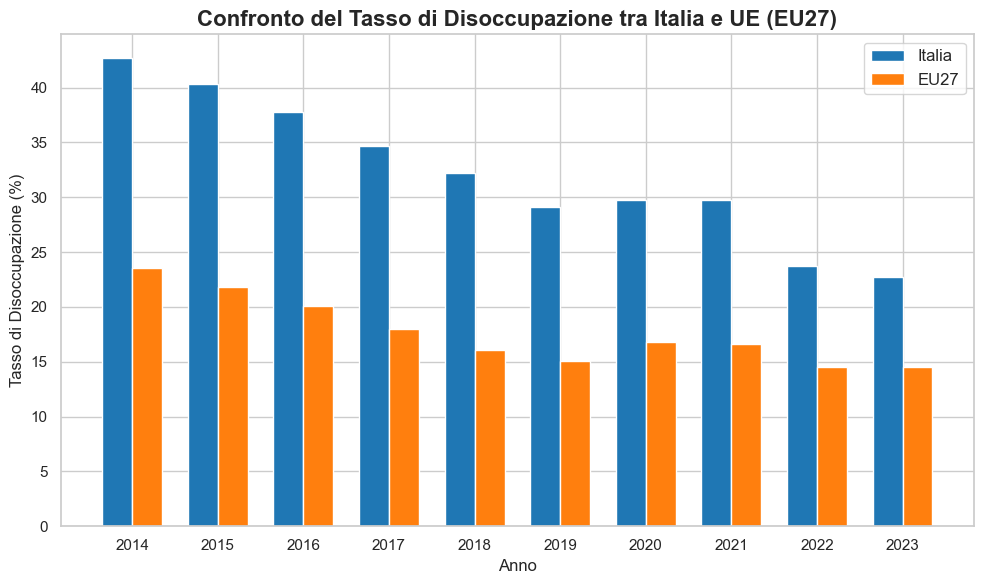

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
eu27 = [23.5, 21.8, 20.1, 18.0, 16.1, 15.1, 16.8, 16.6, 14.5, 14.5]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Impostare la larghezza delle barre
bar_width = 0.35

# Posizione delle barre sull'asse X
index = np.arange(len(years))

# Crea il grafico a barre separate
fig, ax = plt.subplots(figsize=(10, 6))

# Traccia le barre per Italia e EU27
bar1 = ax.bar(index - bar_width / 2, italy, bar_width, label='Italia', color='#1f77b4')
bar2 = ax.bar(index + bar_width / 2, eu27, bar_width, label='EU27', color='#ff7f0e')

# Aggiungi etichette e titolo
ax.set_xlabel('Anno', fontsize=12)
ax.set_ylabel('Tasso di Disoccupazione (%)', fontsize=12)
ax.set_title('Confronto del Tasso di Disoccupazione tra Italia e UE (EU27)', fontsize=16, fontweight='bold')

# Impostare le etichette sugli assi X
ax.set_xticks(index)
ax.set_xticklabels(years)

# Aggiungi la legenda
ax.legend(loc='upper right', fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()


In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
italy = [42.7, 40.4, 37.8, 34.8, 32.2, 29.2, 29.4, 29.7, 23.7, 22.7]
eu = [25.9, 24.2, 22.4, 20.1, 18.1, 17.0, 18.9, 18.8, 16.4, 16.1]
world = [15.1, 15.6, 15.8, 16.0, 15.9, 15.3, 17.1, 15.7, 14.3, 13.8]

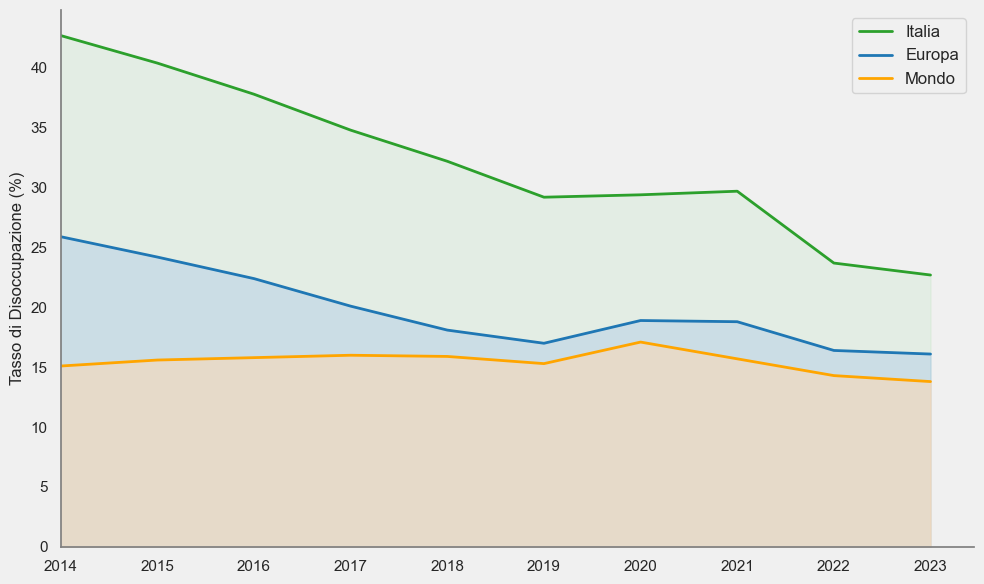

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
italy = [42.7, 40.4, 37.8, 34.8, 32.2, 29.2, 29.4, 29.7, 23.7, 22.7]
eu = [25.9, 24.2, 22.4, 20.1, 18.1, 17.0, 18.9, 18.8, 16.4, 16.1]
world = [15.1, 15.6, 15.8, 16.0, 15.9, 15.3, 17.1, 15.7, 14.3, 13.8]

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Tracciare le linee per Italia, Europa e Mondo
plt.plot(years, italy, label='Italia', color='#2ca02c', linewidth=2)
plt.plot(years, eu, label='Europa', color='#1f77b4', linewidth=2)
plt.plot(years, world, label='Mondo', color='orange', linewidth=2)

# Creare l'area sotto ciascuna linea (per enfatizzare l'andamento)
plt.fill_between(years, italy, color='#B2E3B6', alpha=0.2)
plt.fill_between(years, eu, color='#A7C7E7', alpha=0.4)
plt.fill_between(years, world, color='#F9D8B7', alpha=0.6)

# Aggiungere etichette e titolo
plt.xlabel('')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12)
# plt.title('Andamento del Tasso di Disoccupazione per Italia, Europa e Mondo (2014-2023)', fontsize=16, fontweight='bold')

# Impostare gli anni come ticks sull'asse x
plt.xticks(years)

# Aggiungere la legenda
plt.legend(loc='upper right', fontsize=12, facecolor='#F0F0F0')

# Impostare lo sfondo del grafico su grigio pastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigio pastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')    # Colore asse sinistro

# Rimuovere la griglia
plt.grid(False)

# Impostare i limiti per l'asse y (rimuovere spazio sotto lo 0)
plt.ylim(bottom=0)

# Impostare i limiti per l'asse x (rimuovere spazio prima del 2024)
plt.xlim(left=2014)

# Mostrare il grafico
plt.tight_layout()
plt.show()


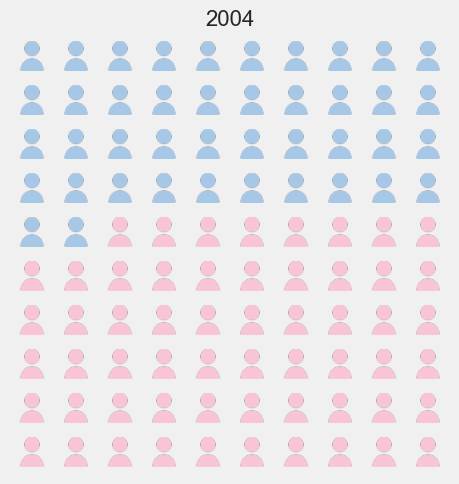

In [112]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Dati di disoccupazione
femmine_disoccupate = 23.895655633333334  # Percentuale di femmine sul totale dei disoccupati
maschi_disoccupati = 16.952255166666667  # Percentuale di maschi sul totale dei disoccupati
totale_disoccupati = 19.997946633333335  # Percentuale di disoccupati sul totale della popolazione

# Calcolare la somma di disoccupati maschi e femmine per ottenere il totale dei disoccupati
totale_disoccupati_calcolato = femmine_disoccupate + maschi_disoccupati

# Calcolare le percentuali relative di maschi e femmine rispetto al totale dei disoccupati
percentuale_femmine = (femmine_disoccupate / totale_disoccupati_calcolato) * 100
percentuale_maschi = (maschi_disoccupati / totale_disoccupati_calcolato) * 100

# Numero totale di omini (100)
totale_omini = 100
omini_maschi = int(round(percentuale_maschi))
omini_femmine = int(round(percentuale_femmine))

# Carica le immagini degli omini
img_male = mpimg.imread("omino_maschi.png")  # Icona azzurra per i maschi
img_female = mpimg.imread("omino_femmine.png")  # Icona rosa per le femmine

# Creazione della griglia
rows, cols = 10, 10  # Griglia 10x10
fig, ax = plt.subplots(figsize=(10, 5))
x_positions = np.tile(np.arange(cols), rows)  # Posizioni x
y_positions = np.repeat(np.arange(rows)[::-1], cols)  # Posizioni y (invertite per partire dall'alto)

# Dimensione delle icone (più piccole)
icon_size = 0.4  # Riduce l'estensione delle immagini

# Aggiunta delle icone alla griglia
for i, (x, y) in enumerate(zip(x_positions, y_positions)):
    if i < omini_maschi:
        # Aggiungi icona maschio
        ax.imshow(
            img_male, 
            extent=(x - icon_size / 1.2, x + icon_size / 1.2, y - icon_size / 1.2, y + icon_size / 1.2), 
            aspect='auto'
        )
    else:
        # Aggiungi icona femmina
        ax.imshow(
            img_female, 
            extent=(x - icon_size / 1.2, x + icon_size / 1.2, y - icon_size / 1.2, y + icon_size / 1.2), 
            aspect='auto'
        )

# Configurazione del grafico
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_aspect('equal')
ax.axis('off')  # Rimuovi gli assi
ax.set_title("2004", fontsize=16)

# Impostare lo sfondo del grafico su grigio pastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigio pastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Mostra il grafico
plt.tight_layout()
plt.show()


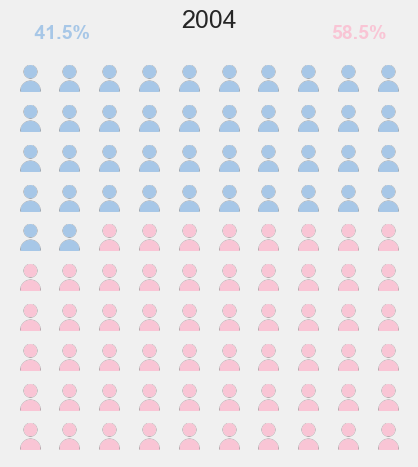

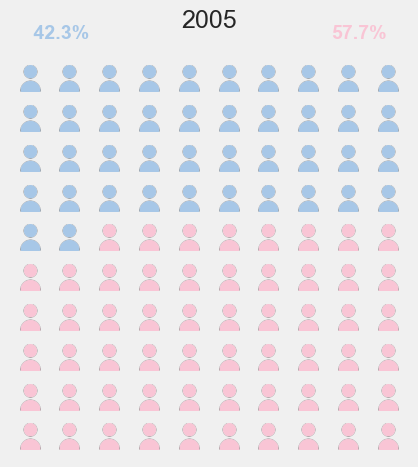

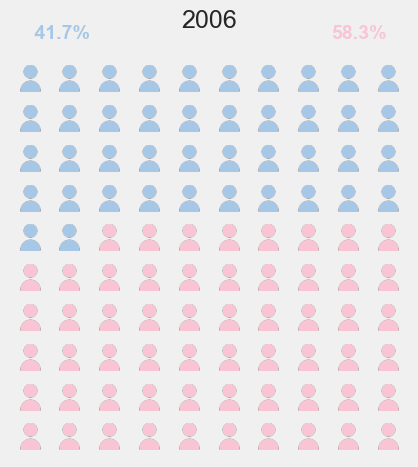

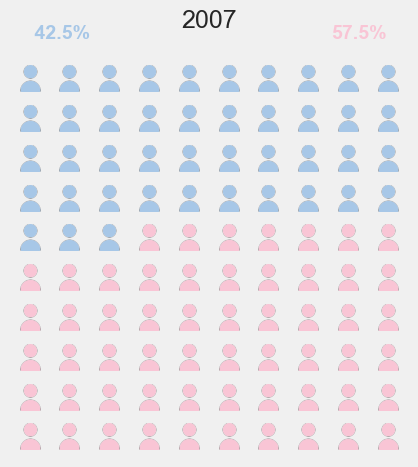

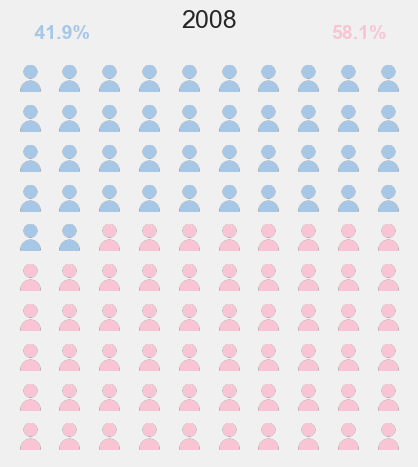

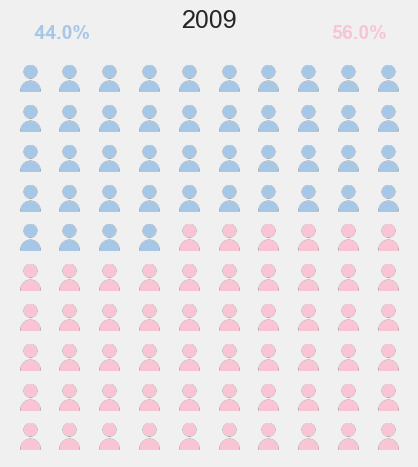

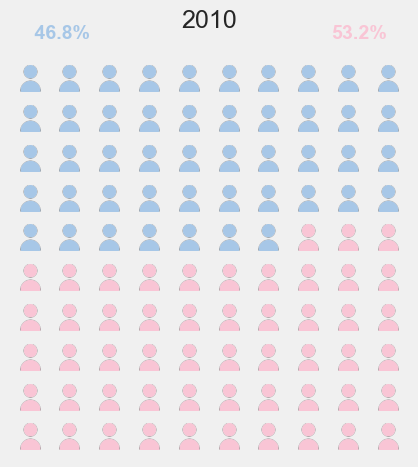

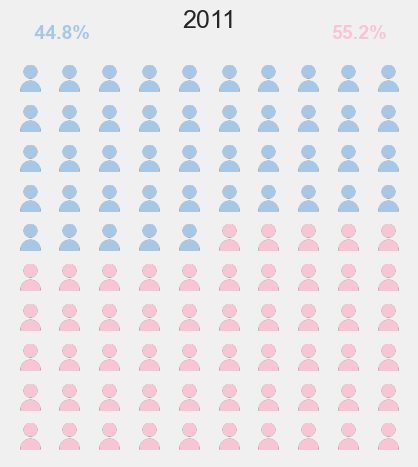

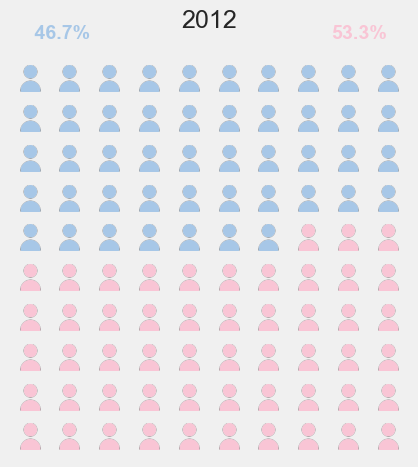

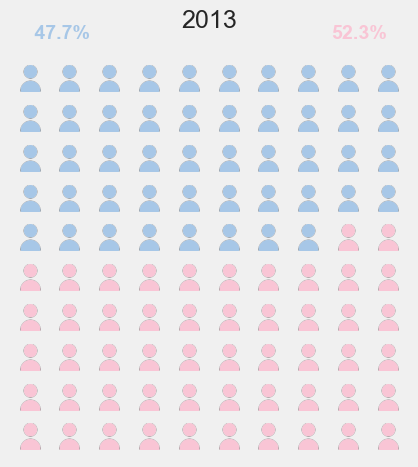

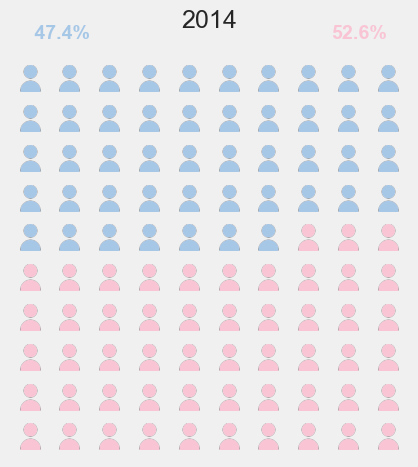

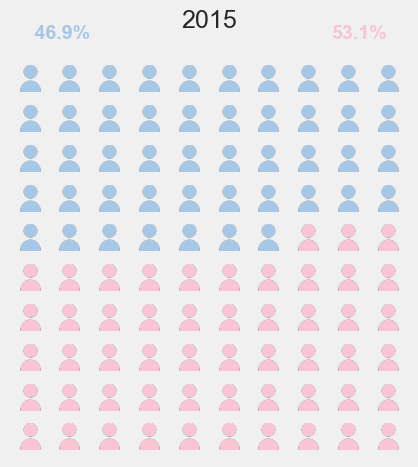

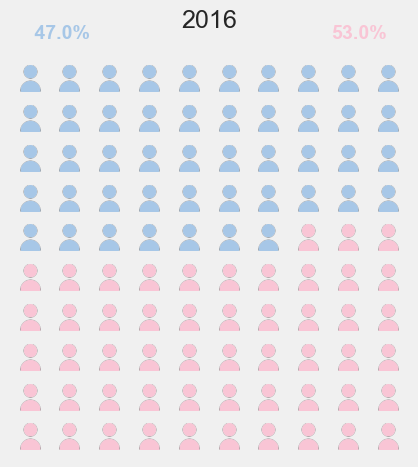

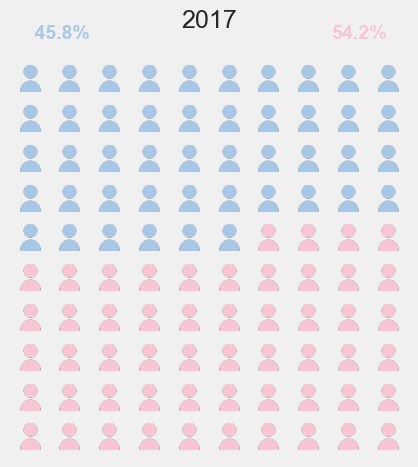

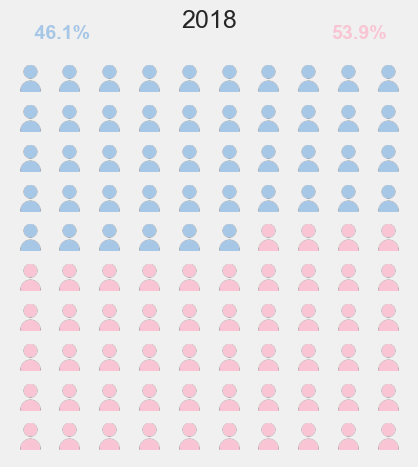

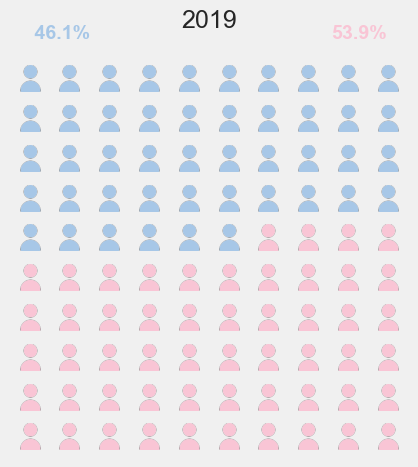

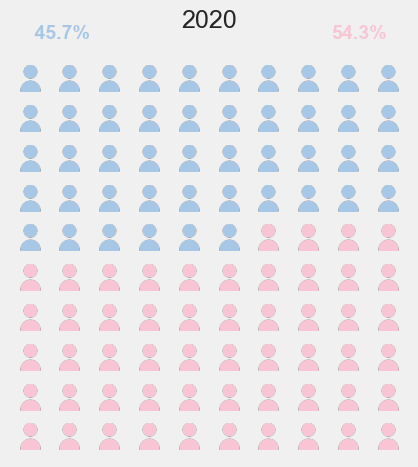

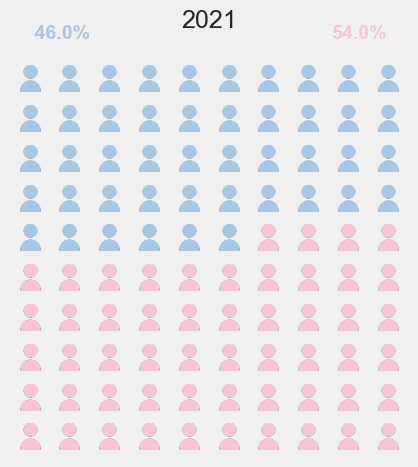

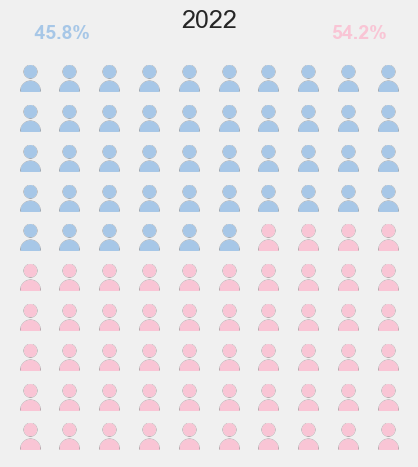

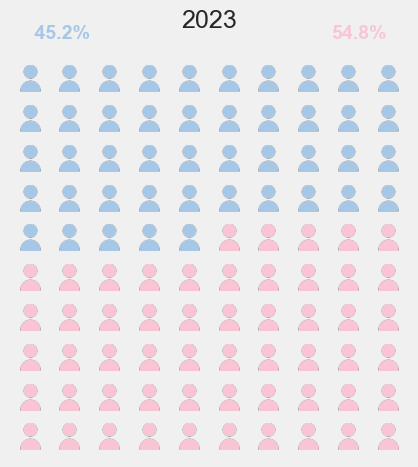

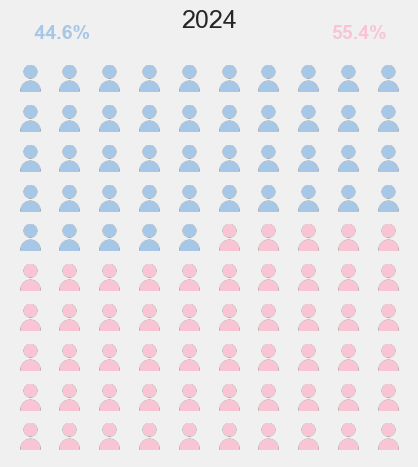

In [113]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

# Carica i dati dal CSV
data = pd.read_csv("combined_unemployment_dataIT.csv")  # Assicurati che il file CSV sia nella stessa directory

# Carica le immagini degli omini
img_male = mpimg.imread("omino_maschi.png")  # Icona azzurra per i maschi
img_female = mpimg.imread("omino_femmine.png")  # Icona rosa per le femmine

# Crea una lista unica di anni disponibili nel dataset
years = data['Anno'].unique()

# Creazione dei grafici per ogni anno
for year in years:
    # Filtra i dati per l'anno corrente
    yearly_data = data[data['Anno'] == year]

    # Estrai i valori per maschi e femmine
    femmine_disoccupate = yearly_data[yearly_data['Sesso'] == 'femmine']['Value'].values[0]
    maschi_disoccupati = yearly_data[yearly_data['Sesso'] == 'maschi']['Value'].values[0]
    
    # Calcola il totale dei disoccupati per quell'anno
    totale_disoccupati_calcolato = femmine_disoccupate + maschi_disoccupati

    # Calcola le percentuali relative di maschi e femmine rispetto al totale dei disoccupati
    percentuale_femmine = (femmine_disoccupate / totale_disoccupati_calcolato) * 100
    percentuale_maschi = (maschi_disoccupati / totale_disoccupati_calcolato) * 100

    # Numero totale di omini (100)
    totale_omini = 100
    omini_maschi = int(round(percentuale_maschi))
    omini_femmine = int(round(percentuale_femmine))

    # Creazione della griglia
    rows, cols = 10, 10  # Griglia 10x10
    fig, ax = plt.subplots(figsize=(10, 5))
    x_positions = np.tile(np.arange(cols), rows)  # Posizioni x
    y_positions = np.repeat(np.arange(rows)[::-1], cols)  # Posizioni y (invertite per partire dall'alto)

    # Dimensione delle icone (più piccole)
    icon_size = 0.4  # Riduce l'estensione delle immagini

    # Aggiunta delle icone alla griglia
    for i, (x, y) in enumerate(zip(x_positions, y_positions)):
        if i < omini_maschi:
            # Aggiungi icona maschio
            ax.imshow(
                img_male, 
                extent=(x - icon_size / 1.2, x + icon_size / 1.2, y - icon_size / 1.2, y + icon_size / 1.2), 
                aspect='auto'
            )
        else:
            # Aggiungi icona femmina
            ax.imshow(
                img_female, 
                extent=(x - icon_size / 1.2, x + icon_size / 1.2, y - icon_size / 1.2, y + icon_size / 1.2), 
                aspect='auto'
            )

    # Configurazione del grafico
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(-0.5, rows - 0.5)
    ax.set_aspect('equal')
    ax.axis('off')  # Rimuovi gli assi

    # Aggiungi il titolo con l'anno
    fig.suptitle(f"{year}", fontsize=18, va='top')

    # Aggiungi le percentuali di uomini e donne sulla stessa riga, più centrali
    fig.text(0.35, 0.95, f" {round(percentuale_maschi, 1)}%", 
             fontsize=14, color='#A7C7E7', va='top', ha='center', fontweight='bold')
    fig.text(0.65, 0.95, f"{round(percentuale_femmine, 1)}%", 
             fontsize=14, color='#F9C5D5', va='top', ha='center', fontweight='bold')

    # Impostare lo sfondo del grafico su grigio pastello
    plt.gca().set_facecolor('#F0F0F0')

    # Impostare lo sfondo dell'intera figura su grigio pastello
    plt.gcf().patch.set_facecolor('#F0F0F0')

    # Mostra il grafico
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Aggiustare il layout per lasciare spazio per il titolo e il testo
    plt.show()


Colonne nel dataset: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
Dati finali:                      Country Name  Year  Youth_Unemployment
8247  Africa Eastern and Southern  1991           14.449872
8248                  Afghanistan  1991           10.205000
8249   Africa Western and Central  1991            8.205040
8250                       Angola  1991      

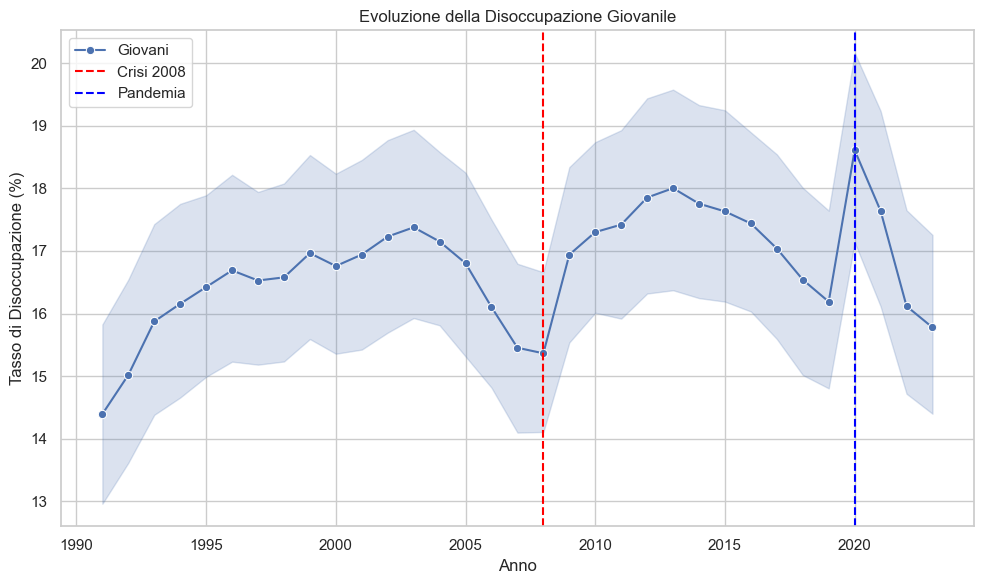

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dei dati
data = pd.read_csv('./disoccupazioneMondo.csv')

# Controllo delle colonne disponibili
print("Colonne nel dataset:", data.columns)

# Selezioniamo solo le colonne necessarie
# La colonna 'Country Name' e le colonne degli anni (da 1960 a 2023)
years = [str(year) for year in range(1960, 2024)]  # Anni da 1960 a 2023

# Filtro i dati per ottenere solo le colonne utili
data_filtered = data[['Country Name'] + years]

# Trasformazione con melt
youth_unemployment = data_filtered.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='Youth_Unemployment'
)

# Pulizia dei dati: convertiamo 'Year' in numerico e rimuoviamo valori NaN
youth_unemployment['Year'] = pd.to_numeric(youth_unemployment['Year'], errors='coerce')
youth_unemployment = youth_unemployment.dropna(subset=['Youth_Unemployment'])

# Verifica dei dati finali
print("Dati finali:", youth_unemployment.head())

# Grafico
plt.figure(figsize=(10, 6))
sns.lineplot(data=youth_unemployment, x='Year', y='Youth_Unemployment', marker='o', label='Giovani')
plt.axvline(2008, color='red', linestyle='--', label='Crisi 2008')
plt.axvline(2020, color='blue', linestyle='--', label='Pandemia')
plt.title('Evoluzione della Disoccupazione Giovanile')
plt.ylabel('Tasso di Disoccupazione (%)')
plt.xlabel('Anno')
plt.legend()
plt.tight_layout()
plt.show()


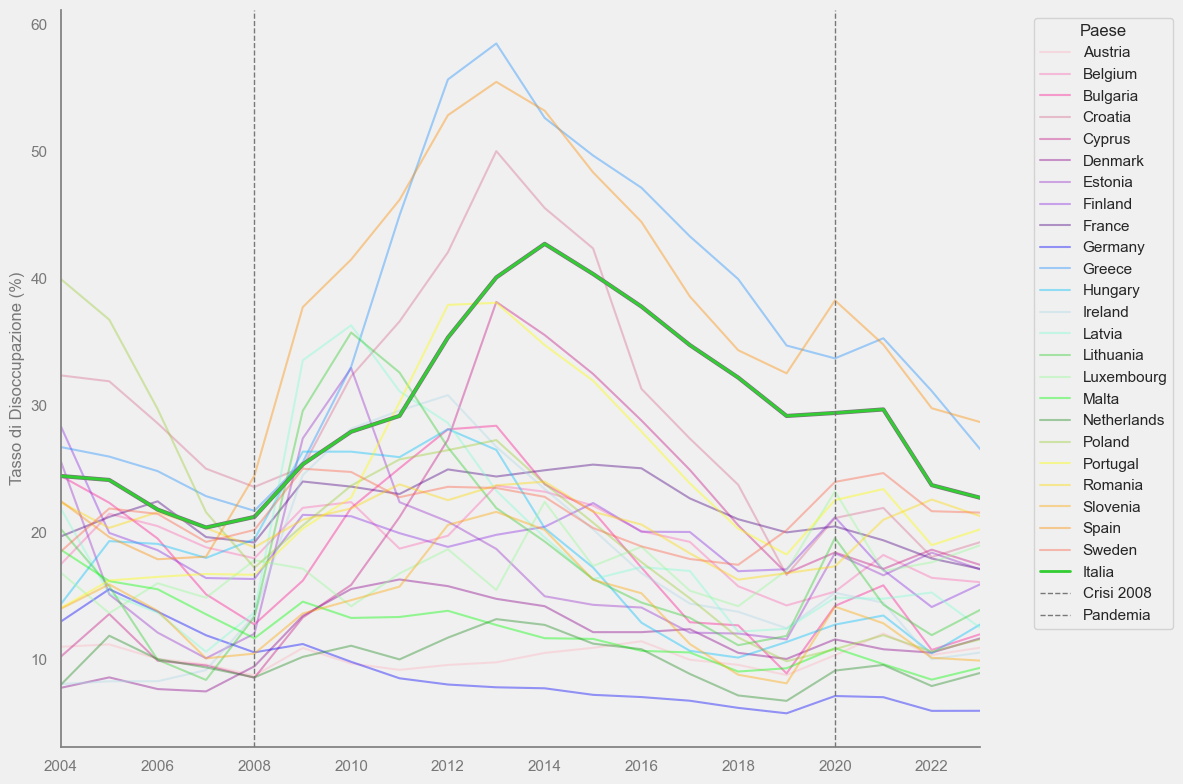

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricamento dei dati
data = pd.read_csv('./disoccupazioneMondo.csv')

# Lista dei paesi membri dell'Unione Europea (al 2024)
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# Selezioniamo solo le colonne 'Country Name' e gli anni dal 2004 al 2023
years = [str(year) for year in range(2004, 2024)]  # Anni da 2004 a 2023
data_filtered = data[['Country Name'] + years]

# Filtro i dati per i paesi membri dell'Unione Europea
data_eu = data_filtered[data_filtered['Country Name'].isin(eu_countries)]

# Trasformazione con melt
youth_unemployment_eu = data_eu.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='Youth_Unemployment'
)

# Pulizia dei dati
youth_unemployment_eu['Year'] = pd.to_numeric(youth_unemployment_eu['Year'], errors='coerce')
youth_unemployment_eu = youth_unemployment_eu.dropna(subset=['Youth_Unemployment'])

# La tua palette pastello senza trasparenza
pastel_palette = [
    "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585", "#8B008B", "#9932CC", "#8A2BE2",
    "#4B0082", "#0000FF", "#1E90FF", "#00BFFF", "#ADD8E6", "#7FFFD4", "#32CD32", "#98FB98",
    "#00FF00", "#228B22", "#9ACD32", "#FFFF00", "#FFD700", "#FFA500", "#FF8C00", "#FF6347",
    "#FF4500", "#DC143C", "#B22222", "#A52A2A", "#8B4513"
]

# Grafico
plt.figure(figsize=(12, 8))

# Linee per tutti i paesi con colori distinti (palette pastello) senza Italia
youth_unemployment_eu_no_italy = youth_unemployment_eu[youth_unemployment_eu['Country Name'] != 'Italy']
for i, (name, group) in enumerate(youth_unemployment_eu_no_italy.groupby('Country Name')):
    # Applicare opacità al 50% usando il parametro 'alpha' direttamente in matplotlib
    plt.plot(group['Year'], group['Youth_Unemployment'], label=name, color=pastel_palette[i], alpha=0.4)

# Evidenziare la linea per l'Italia in verde brillante, senza aggiungere alla legenda
italy_data = youth_unemployment_eu[youth_unemployment_eu['Country Name'] == 'Italy']

# Traccia la linea con il bordo nero
plt.plot(italy_data['Year'], italy_data['Youth_Unemployment'], color='#787878', linewidth=3, zorder=2)

# Traccia la linea verde brillante sopra la linea nera
plt.plot(italy_data['Year'], italy_data['Youth_Unemployment'], color='#32CD32', label='Italia', linewidth=2, zorder=3)

# Aggiungi linee per eventi importanti (Crisi 2008 e Pandemia)
plt.axvline(2008, color='#787878', linestyle='--', linewidth=1, label='Crisi 2008', zorder=4)
plt.axvline(2020, color='#787878', linestyle='--', linewidth=1, label='Pandemia', zorder=4)

# Titolo e etichette
#plt.title('Evoluzione della Disoccupazione Giovanile nei Paesi dell\'Unione Europea (2004-2023)')
plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')
plt.xlabel('')

# Forza la visualizzazione di ogni 2 anni nell'asse X
plt.xticks(ticks=range(2004, 2024, 2), labels=[str(year) for year in range(2004, 2024, 2)], color='#787878')
plt.yticks(color='#787878')

#togli spazio prima del 2004
plt.xlim(left=2004)

# fine asse y a 2023
plt.xlim(right=2023)

# Legenda
plt.legend(title='Paese', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='#F0F0F0')

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('gray')  # Colore asse inferiore
plt.gca().spines['left'].set_color('gray')   # Colore asse sinistro

# Rimuovere la griglia
plt.grid(False)

# Rimuovere i trattini dagli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

plt.tight_layout()
plt.show()


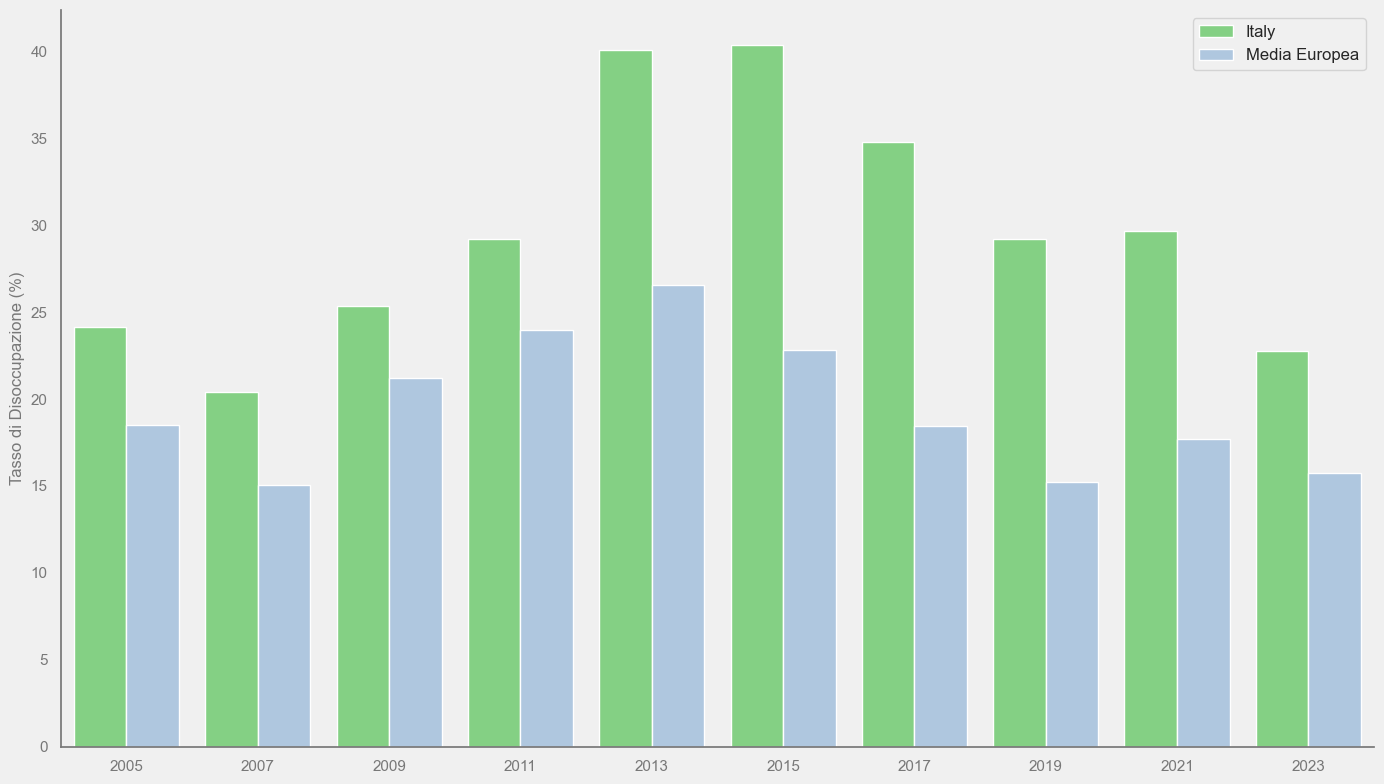

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dei dati
data = pd.read_csv('./disoccupazioneMondo.csv')

# Lista dei paesi membri dell'Unione Europea (al 2024)
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# Selezioniamo solo le colonne 'Country Name' e gli anni dal 2004 al 2023
years = [str(year) for year in range(2004, 2024)]  # Anni da 2004 a 2023
data_filtered = data[['Country Name'] + years]

# Filtro i dati per i paesi membri dell'Unione Europea
data_eu = data_filtered[data_filtered['Country Name'].isin(eu_countries)]

# Trasformazione con melt
youth_unemployment_eu = data_eu.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='Youth_Unemployment'
)

# Pulizia dei dati
youth_unemployment_eu['Year'] = pd.to_numeric(youth_unemployment_eu['Year'], errors='coerce')
youth_unemployment_eu = youth_unemployment_eu.dropna(subset=['Youth_Unemployment'])

# Calcolare la media della disoccupazione giovanile in Europa (includendo l'Italia)
eu_avg = youth_unemployment_eu.groupby('Year')['Youth_Unemployment'].mean().reset_index()
eu_avg['Country Name'] = 'Media Europea'

# Estrai i dati per l'Italia
italy_data = youth_unemployment_eu[youth_unemployment_eu['Country Name'] == 'Italy']

# Creare un dataframe per le barre (combinando i dati dell'Italia e della media europea)
combined_data = pd.concat([italy_data[['Year', 'Youth_Unemployment', 'Country Name']], 
                           eu_avg[['Year', 'Youth_Unemployment', 'Country Name']]])

# Filtrare solo gli anni da 2005 a 2023 e ogni 2 anni (ad esempio 2005, 2007, 2009, ...)
combined_data_filtered = combined_data[(combined_data['Year'] >= 2005) & (combined_data['Year'] <= 2023)]
combined_data_filtered = combined_data_filtered[combined_data_filtered['Year'] % 2 == 1]

# Grafico a barre
plt.figure(figsize=(14, 8))

# Definire la palette personalizzata con il colore verde pastello per l'Italia e blu pastello per la Media Europea
palette = {'Italy': '#77DD77', 'Media Europea': '#A7C7E7'}  # Colori pastello

# Barplot con barra per Italia e Media Europea per ogni anno, solo gli anni dispari dal 2005 al 2023
sns.barplot(data=combined_data_filtered, x='Year', y='Youth_Unemployment', hue='Country Name', palette=palette)

# Titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')
plt.xlabel('')

# Forza la visualizzazione di ogni 2 anni nell'asse X
plt.xticks(ticks=range(0, len(combined_data_filtered['Year'].unique())), labels=[str(year) for year in range(2005, 2024, 2)], color='#787878')
plt.yticks(color='#787878')

# Rimuovere la griglia
plt.grid(False)

# Posizionare la legenda in alto a destra
plt.legend(title='', loc='upper right', fontsize=12, facecolor='#F0F0F0')

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

plt.tight_layout()
plt.show()


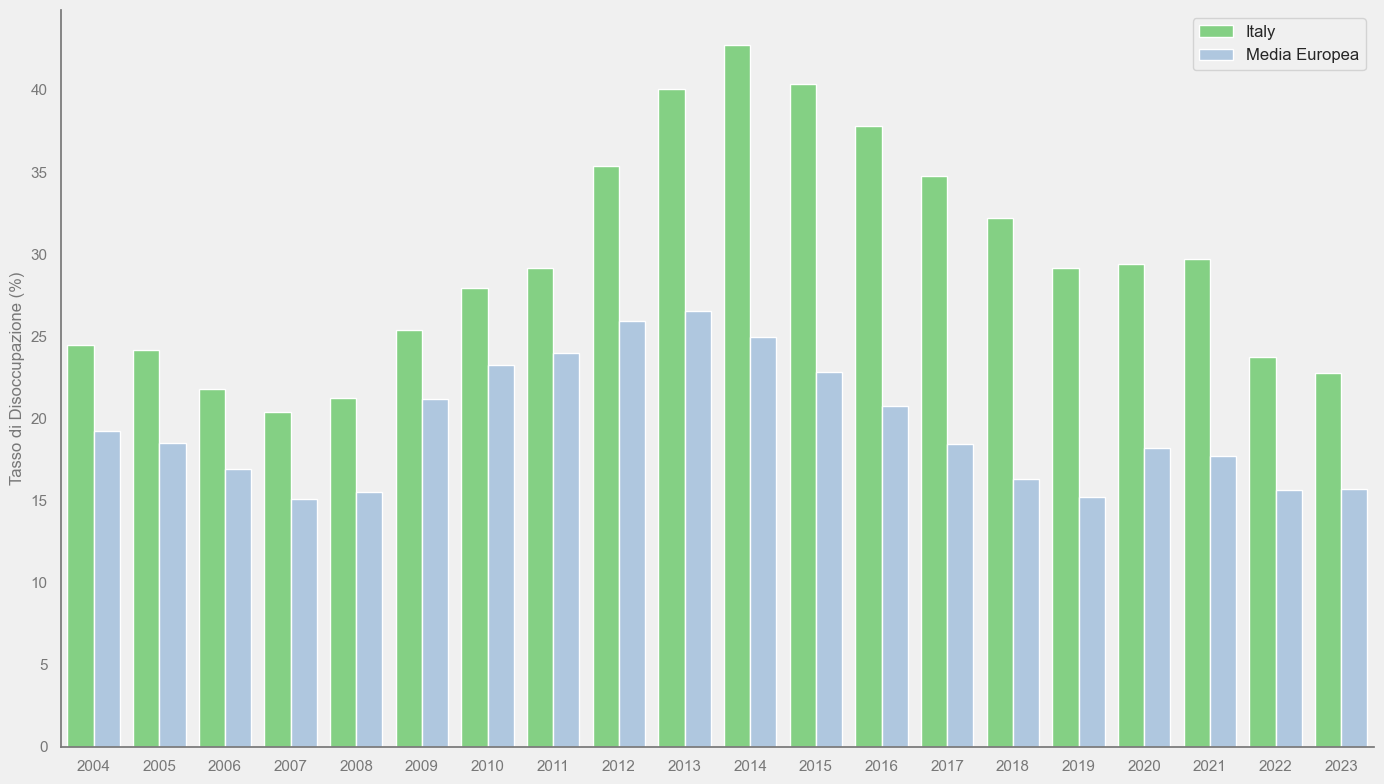

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dei dati
data = pd.read_csv('./disoccupazioneMondo.csv')

# Lista dei paesi membri dell'Unione Europea (al 2024)
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

# Selezioniamo solo le colonne 'Country Name' e gli anni dal 2004 al 2023
years = [str(year) for year in range(2004, 2024)]  # Anni da 2004 a 2023
data_filtered = data[['Country Name'] + years]

# Filtro i dati per i paesi membri dell'Unione Europea
data_eu = data_filtered[data_filtered['Country Name'].isin(eu_countries)]

# Trasformazione con melt
youth_unemployment_eu = data_eu.melt(
    id_vars=['Country Name'], 
    var_name='Year', 
    value_name='Youth_Unemployment'
)

# Pulizia dei dati
youth_unemployment_eu['Year'] = pd.to_numeric(youth_unemployment_eu['Year'], errors='coerce')
youth_unemployment_eu = youth_unemployment_eu.dropna(subset=['Youth_Unemployment'])

# Calcolare la media della disoccupazione giovanile in Europa (includendo l'Italia)
eu_avg = youth_unemployment_eu.groupby('Year')['Youth_Unemployment'].mean().reset_index()
eu_avg['Country Name'] = 'Media Europea'

# Estrai i dati per l'Italia
italy_data = youth_unemployment_eu[youth_unemployment_eu['Country Name'] == 'Italy']

# Creare un dataframe per le barre (combinando i dati dell'Italia e della media europea)
combined_data = pd.concat([italy_data[['Year', 'Youth_Unemployment', 'Country Name']], 
                           eu_avg[['Year', 'Youth_Unemployment', 'Country Name']]])

# Grafico a barre
plt.figure(figsize=(14, 8))

# Definire la palette personalizzata con il colore verde pastello per l'Italia e blu pastello per la Media Europea
palette = {'Italy': '#77DD77', 'Media Europea': '#A7C7E7'}  # Colori pastello

# Barplot con barra per Italia e Media Europea per ogni anno
sns.barplot(data=combined_data, x='Year', y='Youth_Unemployment', hue='Country Name', palette=palette)

# Titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')
plt.xlabel('')

# Forza la visualizzazione di tutti gli anni sull'asse X
plt.xticks(ticks=range(len(combined_data['Year'].unique())), labels=[str(year) for year in range(2004, 2024)], color='#787878')
plt.yticks(color='#787878')

# Posizionare la legenda in alto a destra
plt.legend(title='', loc='upper right', fontsize=12, facecolor='#F0F0F0')

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

# Rimuovere la griglia
plt.grid(False)

plt.tight_layout()
plt.show()


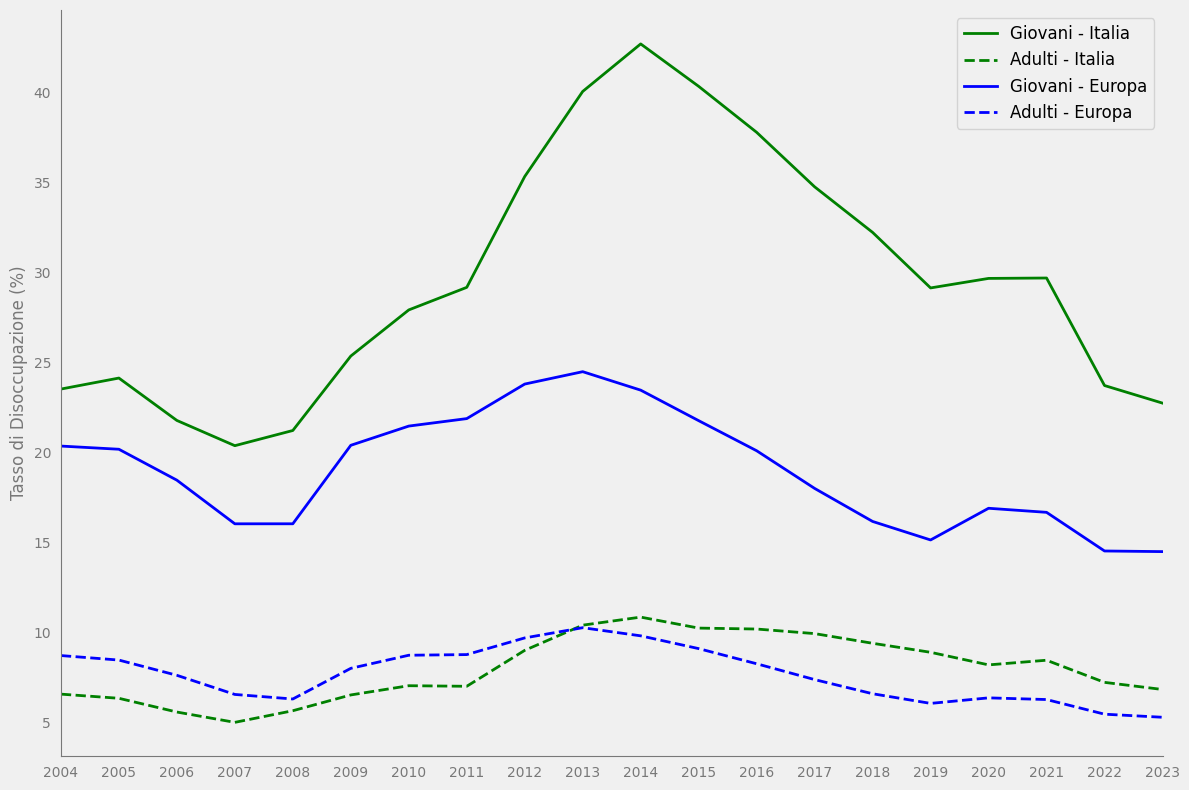

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dei dati
data = pd.read_csv('unem-iteu.csv')

# Filtriamo i dati per la fascia di età "15-24 anni" (Giovani) e "25-64 anni" (Adulti) e lo stato di disoccupazione (UNE)
data_youth_ita = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]
data_adults_ita = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]

data_youth_eu = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]
data_adults_eu = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]

# Selezioniamo solo le colonne 'TIME_PERIOD', 'OBS_VALUE' e 'REF_AREA'
data_youth_ita = data_youth_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_ita = data_adults_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_youth_eu = data_youth_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_eu = data_adults_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]

# Rimuoviamo i valori NaN
data_youth_ita = data_youth_ita.dropna(subset=['OBS_VALUE'])
data_adults_ita = data_adults_ita.dropna(subset=['OBS_VALUE'])
data_youth_eu = data_youth_eu.dropna(subset=['OBS_VALUE'])
data_adults_eu = data_adults_eu.dropna(subset=['OBS_VALUE'])

# Convertiamo la colonna 'TIME_PERIOD' in formato numerico
data_youth_ita['TIME_PERIOD'] = pd.to_numeric(data_youth_ita['TIME_PERIOD'], errors='coerce')
data_adults_ita['TIME_PERIOD'] = pd.to_numeric(data_adults_ita['TIME_PERIOD'], errors='coerce')
data_youth_eu['TIME_PERIOD'] = pd.to_numeric(data_youth_eu['TIME_PERIOD'], errors='coerce')
data_adults_eu['TIME_PERIOD'] = pd.to_numeric(data_adults_eu['TIME_PERIOD'], errors='coerce')

# Filtriamo i dati per includere solo gli anni tra il 2009 e il 2023
data_youth_ita = data_youth_ita[(data_youth_ita['TIME_PERIOD'] >= 2004) & (data_youth_ita['TIME_PERIOD'] <= 2023)]
data_adults_ita = data_adults_ita[(data_adults_ita['TIME_PERIOD'] >= 2004) & (data_adults_ita['TIME_PERIOD'] <= 2023)]
data_youth_eu = data_youth_eu[(data_youth_eu['TIME_PERIOD'] >= 2004) & (data_youth_eu['TIME_PERIOD'] <= 2023)]
data_adults_eu = data_adults_eu[(data_adults_eu['TIME_PERIOD'] >= 2004) & (data_adults_eu['TIME_PERIOD'] <= 2023)]

# Ordinare i dati per l'anno
data_youth_ita = data_youth_ita.sort_values(by='TIME_PERIOD')
data_adults_ita = data_adults_ita.sort_values(by='TIME_PERIOD')
data_youth_eu = data_youth_eu.sort_values(by='TIME_PERIOD')
data_adults_eu = data_adults_eu.sort_values(by='TIME_PERIOD')

# Creare il grafico
plt.figure(figsize=(12, 8))

# Creare la linea per i giovani in Italia
plt.plot(data_youth_ita['TIME_PERIOD'], data_youth_ita['OBS_VALUE'], label='Giovani - Italia', color='green', linewidth=2)

# Creare la linea per gli adulti in Italia
plt.plot(data_adults_ita['TIME_PERIOD'], data_adults_ita['OBS_VALUE'], label='Adulti - Italia', color='green', linestyle='--', linewidth=2)

# Creare la linea per i giovani in Europa
plt.plot(data_youth_eu['TIME_PERIOD'], data_youth_eu['OBS_VALUE'], label='Giovani - Europa', color='blue', linewidth=2)

# Creare la linea per gli adulti in Europa
plt.plot(data_adults_eu['TIME_PERIOD'], data_adults_eu['OBS_VALUE'], label='Adulti - Europa', color='blue', linestyle='--', linewidth=2)

# Aggiungere il titolo e le etichette
#plt.title('Confronto del Tasso di Disoccupazione: Giovani vs Adulti in Italia e Europa (2009-2023)', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12)

# Aggiungere la legenda
plt.legend(facecolor='#F0F0F0', fontsize=12)
# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

# Rimuovere la griglia
plt.grid(False)

# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024), labels=[str(year) for year in range(2004, 2024)], color='#787878')
plt.yticks(color='#787878')

# rimuovere spazio prima del 2009
plt.xlim(left=2004, right=2023)

# rimuovere scritta Anno sull'asse x
plt.xlabel('', color='#787878')

plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')

# Mostrare il grafico
plt.grid(False)
plt.tight_layout()
plt.show()


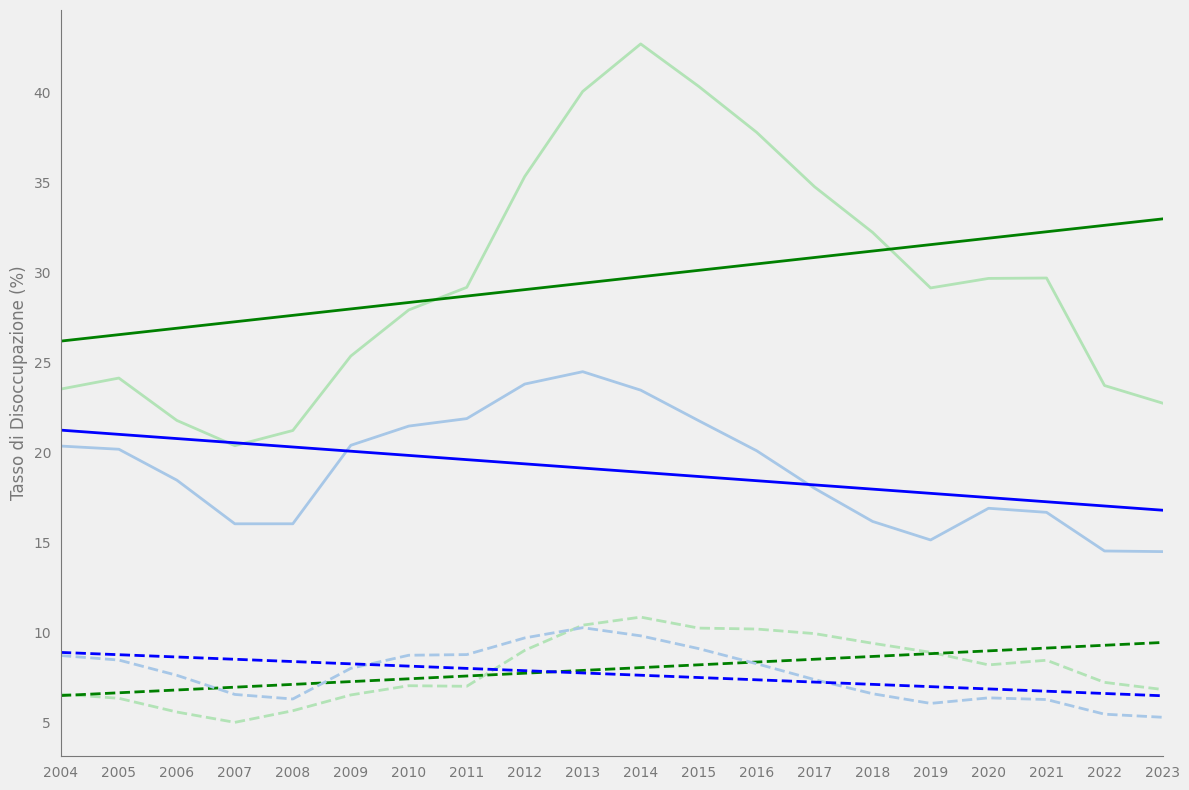

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dei dati
data = pd.read_csv('unem-iteu.csv')

# Filtriamo i dati per la fascia di età "15-24 anni" (Giovani) e "25-64 anni" (Adulti) e lo stato di disoccupazione (UNE)
data_youth_ita = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]
data_adults_ita = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]

data_youth_eu = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]
data_adults_eu = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]

# Selezioniamo solo le colonne 'TIME_PERIOD', 'OBS_VALUE' e 'REF_AREA'
data_youth_ita = data_youth_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_ita = data_adults_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_youth_eu = data_youth_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_eu = data_adults_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]

# Rimuoviamo i valori NaN
data_youth_ita = data_youth_ita.dropna(subset=['OBS_VALUE'])
data_adults_ita = data_adults_ita.dropna(subset=['OBS_VALUE'])
data_youth_eu = data_youth_eu.dropna(subset=['OBS_VALUE'])
data_adults_eu = data_adults_eu.dropna(subset=['OBS_VALUE'])

# Convertiamo la colonna 'TIME_PERIOD' in formato numerico
data_youth_ita['TIME_PERIOD'] = pd.to_numeric(data_youth_ita['TIME_PERIOD'], errors='coerce')
data_adults_ita['TIME_PERIOD'] = pd.to_numeric(data_adults_ita['TIME_PERIOD'], errors='coerce')
data_youth_eu['TIME_PERIOD'] = pd.to_numeric(data_youth_eu['TIME_PERIOD'], errors='coerce')
data_adults_eu['TIME_PERIOD'] = pd.to_numeric(data_adults_eu['TIME_PERIOD'], errors='coerce')

# Filtriamo i dati per includere solo gli anni tra il 2009 e il 2023
data_youth_ita = data_youth_ita[(data_youth_ita['TIME_PERIOD'] >= 2004) & (data_youth_ita['TIME_PERIOD'] <= 2023)]
data_adults_ita = data_adults_ita[(data_adults_ita['TIME_PERIOD'] >= 2004) & (data_adults_ita['TIME_PERIOD'] <= 2023)]
data_youth_eu = data_youth_eu[(data_youth_eu['TIME_PERIOD'] >= 2004) & (data_youth_eu['TIME_PERIOD'] <= 2023)]
data_adults_eu = data_adults_eu[(data_adults_eu['TIME_PERIOD'] >= 2004) & (data_adults_eu['TIME_PERIOD'] <= 2023)]

# Ordinare i dati per l'anno
data_youth_ita = data_youth_ita.sort_values(by='TIME_PERIOD')
data_adults_ita = data_adults_ita.sort_values(by='TIME_PERIOD')
data_youth_eu = data_youth_eu.sort_values(by='TIME_PERIOD')
data_adults_eu = data_adults_eu.sort_values(by='TIME_PERIOD')

# Funzione per aggiungere la linea di trend
def plot_trendline(x, y, label, color, linestyle, linewidth):
    # Calcolare la linea di trend con numpy.polyfit
    p = np.polyfit(x, y, 1)  # p[0] è la pendenza, p[1] è l'intercetta
    trend = np.polyval(p, x)  # Calcoliamo i valori della linea di trend
    
    # Plot della linea di trend
    plt.plot(x, trend, label=label, color=color, linestyle=linestyle, linewidth=linewidth)

# Creare il grafico
plt.figure(figsize=(12, 8))

# Creare la linea per i giovani in Italia
plt.plot(data_youth_ita['TIME_PERIOD'], data_youth_ita['OBS_VALUE'], label='Giovani (15-24 anni) - Italia', color='#B2E3B6', linewidth=2)

# Aggiungere la linea di trend per i giovani in Italia
plot_trendline(data_youth_ita['TIME_PERIOD'], data_youth_ita['OBS_VALUE'], label='Trend Giovani Italia', color='green', linestyle='-', linewidth=2)

# Creare la linea per gli adulti in Italia
plt.plot(data_adults_ita['TIME_PERIOD'], data_adults_ita['OBS_VALUE'], label='Adulti (25-64 anni) - Italia', color='#B2E3B6', linestyle='--', linewidth=2)

# Aggiungere la linea di trend per gli adulti in Italia
plot_trendline(data_adults_ita['TIME_PERIOD'], data_adults_ita['OBS_VALUE'], label='Trend Adulti Italia', color='green', linestyle='--', linewidth=2)

# Creare la linea per i giovani in Europa
plt.plot(data_youth_eu['TIME_PERIOD'], data_youth_eu['OBS_VALUE'], label='Giovani (15-24 anni) - Europa', color='#A7C7E7', linewidth=2)

# Aggiungere la linea di trend per i giovani in Europa
plot_trendline(data_youth_eu['TIME_PERIOD'], data_youth_eu['OBS_VALUE'], label='Trend Giovani Europa', color='blue', linestyle='-', linewidth=2)

# Creare la linea per gli adulti in Europa
plt.plot(data_adults_eu['TIME_PERIOD'], data_adults_eu['OBS_VALUE'], label='Adulti (25-64 anni) - Europa', color='#A7C7E7', linestyle='--', linewidth=2)

# Aggiungere la linea di trend per gli adulti in Europa
plot_trendline(data_adults_eu['TIME_PERIOD'], data_adults_eu['OBS_VALUE'], label='Trend Adulti Europa', color='blue', linestyle='--', linewidth=2)

# Aggiungere il titolo e le etichette
#plt.title('Confronto del Tasso di Disoccupazione: Giovani vs Adulti in Italia e Europa (2009-2023)', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12)

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

# Rimuovere la griglia
plt.grid(False)

# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024), labels=[str(year) for year in range(2004, 2024)], color='#787878')
plt.yticks(color='#787878')

# rimuovere spazio prima del 2009
plt.xlim(left=2004, right=2023)

# rimuovere scritta Anno sull'asse x
plt.xlabel('', color='#787878')

plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')

# Mostrare il grafico
plt.grid(False)

# Aggiungere la legenda
#plt.legend()

# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024))

# Mostrare il grafico
plt.grid(False)
plt.tight_layout()
plt.show()


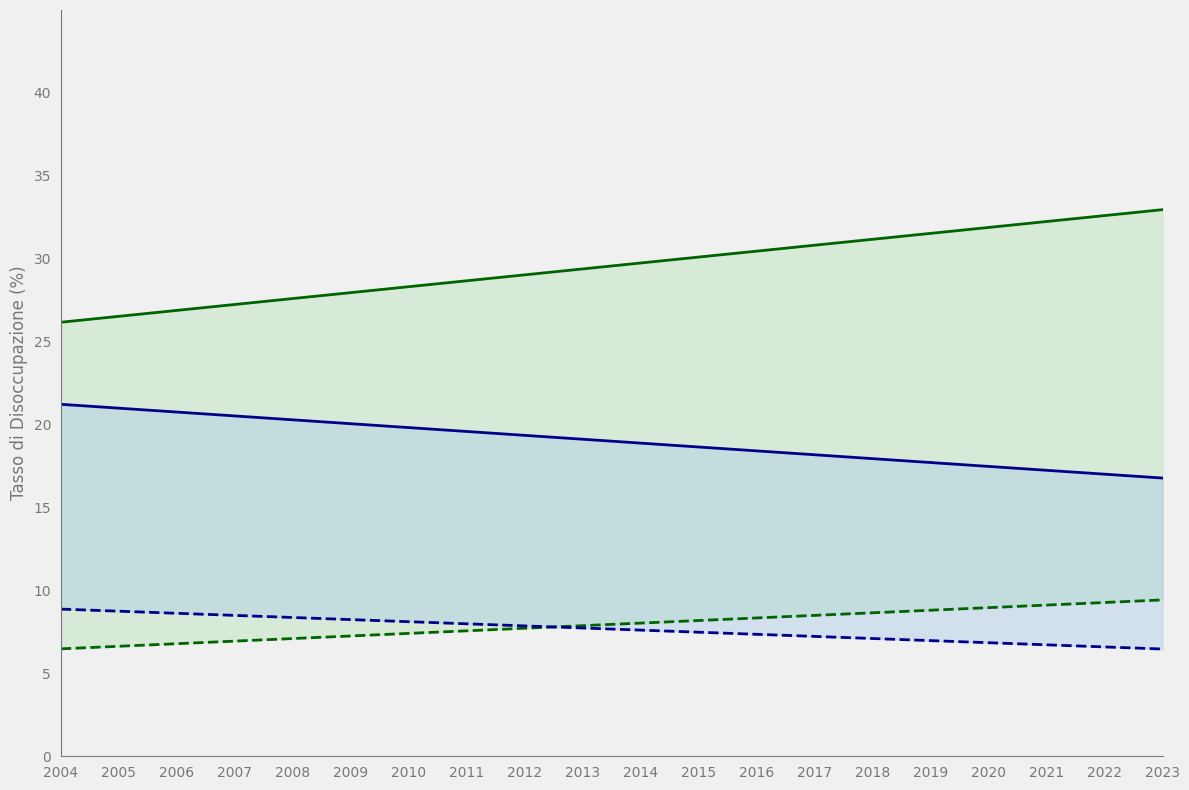

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dei dati
data = pd.read_csv('unem-iteu.csv')

# Filtriamo i dati per la fascia di età "15-24 anni" (Giovani) e "25-64 anni" (Adulti) e lo stato di disoccupazione (UNE)
data_youth_ita = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]
data_adults_ita = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]

data_youth_eu = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]
data_adults_eu = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]

# Selezioniamo solo le colonne 'TIME_PERIOD', 'OBS_VALUE' e 'REF_AREA'
data_youth_ita = data_youth_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_ita = data_adults_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_youth_eu = data_youth_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_eu = data_adults_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]

# Rimuoviamo i valori NaN
data_youth_ita = data_youth_ita.dropna(subset=['OBS_VALUE'])
data_adults_ita = data_adults_ita.dropna(subset=['OBS_VALUE'])
data_youth_eu = data_youth_eu.dropna(subset=['OBS_VALUE'])
data_adults_eu = data_adults_eu.dropna(subset=['OBS_VALUE'])

# Convertiamo la colonna 'TIME_PERIOD' in formato numerico
data_youth_ita['TIME_PERIOD'] = pd.to_numeric(data_youth_ita['TIME_PERIOD'], errors='coerce')
data_adults_ita['TIME_PERIOD'] = pd.to_numeric(data_adults_ita['TIME_PERIOD'], errors='coerce')
data_youth_eu['TIME_PERIOD'] = pd.to_numeric(data_youth_eu['TIME_PERIOD'], errors='coerce')
data_adults_eu['TIME_PERIOD'] = pd.to_numeric(data_adults_eu['TIME_PERIOD'], errors='coerce')

# Filtriamo i dati per includere solo gli anni tra il 2009 e il 2023
data_youth_ita = data_youth_ita[(data_youth_ita['TIME_PERIOD'] >= 2004) & (data_youth_ita['TIME_PERIOD'] <= 2023)]
data_adults_ita = data_adults_ita[(data_adults_ita['TIME_PERIOD'] >= 2004) & (data_adults_ita['TIME_PERIOD'] <= 2023)]
data_youth_eu = data_youth_eu[(data_youth_eu['TIME_PERIOD'] >= 2004) & (data_youth_eu['TIME_PERIOD'] <= 2023)]
data_adults_eu = data_adults_eu[(data_adults_eu['TIME_PERIOD'] >= 2004) & (data_adults_eu['TIME_PERIOD'] <= 2023)]

# Ordinare i dati per l'anno
data_youth_ita = data_youth_ita.sort_values(by='TIME_PERIOD')
data_adults_ita = data_adults_ita.sort_values(by='TIME_PERIOD')
data_youth_eu = data_youth_eu.sort_values(by='TIME_PERIOD')
data_adults_eu = data_adults_eu.sort_values(by='TIME_PERIOD')

# Funzione per aggiungere la linea di trend
def plot_trendline(x, y, label, color, linestyle, linewidth):
    # Calcolare la linea di trend con numpy.polyfit
    p = np.polyfit(x, y, 1)  # p[0] è la pendenza, p[1] è l'intercetta
    trend = np.polyval(p, x)  # Calcoliamo i valori della linea di trend
    
    # Plot della linea di trend
    plt.plot(x, trend, label=label, color=color, linestyle=linestyle, linewidth=linewidth)
    
    return trend  # Restituiamo la linea di trend per colorare l'area successivamente

# Creare il grafico
plt.figure(figsize=(12, 8))

# Aggiungere la linea di trend per i giovani in Italia
trend_youth_ita = plot_trendline(data_youth_ita['TIME_PERIOD'], data_youth_ita['OBS_VALUE'], 
                                 label='Trend Giovani Italia', color='darkgreen', linestyle='-', linewidth=2)

# Aggiungere la linea di trend per gli adulti in Italia
trend_adults_ita = plot_trendline(data_adults_ita['TIME_PERIOD'], data_adults_ita['OBS_VALUE'], 
                                  label='Trend Adulti Italia', color='darkgreen', linestyle='--', linewidth=2)

# Colorare l'area tra le linee di trend per l'Italia (Giovani vs Adulti)
plt.fill_between(data_youth_ita['TIME_PERIOD'], trend_youth_ita, trend_adults_ita, color='#B2E3B6', alpha=0.4, 
                 label='Differenza Giovani vs Adulti - Italia')

# Aggiungere la linea di trend per i giovani in Europa
trend_youth_eu = plot_trendline(data_youth_eu['TIME_PERIOD'], data_youth_eu['OBS_VALUE'], 
                                label='Trend Giovani Europa', color='darkblue', linestyle='-', linewidth=2)

# Aggiungere la linea di trend per gli adulti in Europa
trend_adults_eu = plot_trendline(data_adults_eu['TIME_PERIOD'], data_adults_eu['OBS_VALUE'], 
                                 label='Trend Adulti Europa', color='darkblue', linestyle='--', linewidth=2)

# Colorare l'area tra le linee di trend per l'Europa (Giovani vs Adulti)
plt.fill_between(data_youth_eu['TIME_PERIOD'], trend_youth_eu, trend_adults_eu, color='#A7C7E7', alpha=0.4, 
                 label='Differenza Giovani vs Adulti - Europa')

# Aggiungere il titolo e le etichette
#plt.title('Confronto del Tasso di Disoccupazione: Giovani vs Adulti in Italia e Europa (2009-2023)', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12)

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y

# Rimuovere la griglia
plt.grid(False)

# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024), labels=[str(year) for year in range(2004, 2024)], color='#787878')
plt.yticks(color='#787878')

plt.ylim(0, 45)  # Impostare il limite inferiore e superiore sull'asse Y
plt.yticks(range(0, 45, 5))  # Mostrare i valori sull'asse Y ogni 5 punti

# rimuovere spazio prima del 2009
plt.xlim(left=2004, right=2023)

# rimuovere scritta Anno sull'asse x
plt.xlabel('', color='#787878')

plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')

# Mostrare il grafico
plt.grid(False)

# Aggiungere la legenda
#plt.legend()

# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024))

# Mostrare il grafico
plt.grid(False)
plt.tight_layout()
plt.show()


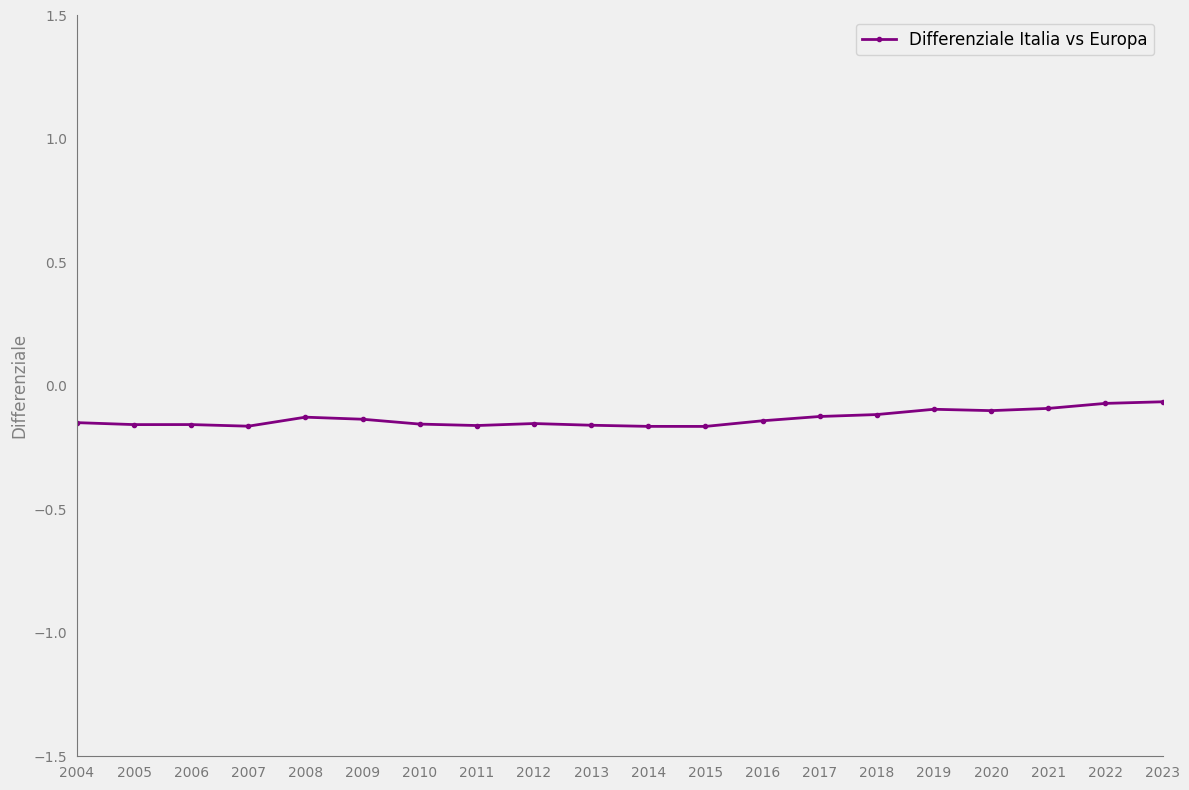

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dei dati
data = pd.read_csv('unem-iteu.csv')

# Filtriamo i dati per la fascia di età "15-24 anni" (Giovani) e "25-64 anni" (Adulti) e lo stato di disoccupazione (UNE)
data_youth_ita = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]
data_adults_ita = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]

data_youth_eu = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]
data_adults_eu = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]

# Selezioniamo solo le colonne 'TIME_PERIOD', 'OBS_VALUE' e 'REF_AREA'
data_youth_ita = data_youth_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_ita = data_adults_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_youth_eu = data_youth_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_eu = data_adults_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]

# Rimuoviamo i valori NaN
data_youth_ita = data_youth_ita.dropna(subset=['OBS_VALUE'])
data_adults_ita = data_adults_ita.dropna(subset=['OBS_VALUE'])
data_youth_eu = data_youth_eu.dropna(subset=['OBS_VALUE'])
data_adults_eu = data_adults_eu.dropna(subset=['OBS_VALUE'])

# Convertiamo la colonna 'TIME_PERIOD' in formato numerico
data_youth_ita['TIME_PERIOD'] = pd.to_numeric(data_youth_ita['TIME_PERIOD'], errors='coerce')
data_adults_ita['TIME_PERIOD'] = pd.to_numeric(data_adults_ita['TIME_PERIOD'], errors='coerce')
data_youth_eu['TIME_PERIOD'] = pd.to_numeric(data_youth_eu['TIME_PERIOD'], errors='coerce')
data_adults_eu['TIME_PERIOD'] = pd.to_numeric(data_adults_eu['TIME_PERIOD'], errors='coerce')

# Filtriamo i dati per includere solo gli anni tra il 2009 e il 2023
data_youth_ita = data_youth_ita[(data_youth_ita['TIME_PERIOD'] >= 2004) & (data_youth_ita['TIME_PERIOD'] <= 2023)]
data_adults_ita = data_adults_ita[(data_adults_ita['TIME_PERIOD'] >= 2004) & (data_adults_ita['TIME_PERIOD'] <= 2023)]
data_youth_eu = data_youth_eu[(data_youth_eu['TIME_PERIOD'] >= 2004) & (data_youth_eu['TIME_PERIOD'] <= 2023)]
data_adults_eu = data_adults_eu[(data_adults_eu['TIME_PERIOD'] >= 2004) & (data_adults_eu['TIME_PERIOD'] <= 2023)]

# Ordinare i dati per l'anno
data_youth_ita = data_youth_ita.sort_values(by='TIME_PERIOD')
data_adults_ita = data_adults_ita.sort_values(by='TIME_PERIOD')
data_youth_eu = data_youth_eu.sort_values(by='TIME_PERIOD')
data_adults_eu = data_adults_eu.sort_values(by='TIME_PERIOD')

# Calcolare il rapporto tra disoccupati adulti e giovani
ratio_ita = data_adults_ita['OBS_VALUE'].values / data_youth_ita['OBS_VALUE'].values
ratio_eu = data_adults_eu['OBS_VALUE'].values / data_youth_eu['OBS_VALUE'].values

# Calcolare i differenziali tra Italia e Europa
differential_ita_eu = ratio_ita - ratio_eu

# Creare il grafico per il differenziale
plt.figure(figsize=(12, 8))

# Tracciare il differenziale
plt.plot(data_youth_ita['TIME_PERIOD'], differential_ita_eu, marker='o', linestyle='-', color='purple', linewidth=2, markersize=3, label="Differenziale Italia vs Europa")

# Espandere l'asse y per rendere visibile il differenziale
plt.ylim(-1.5, 1.5)  # Limiti dell'asse y espansi per visualizzare meglio la linea orizzontale

plt.xlim(left=2004, right=2023)  # Limiti dell'asse x

# Aggiungere il titolo e le etichette
#plt.title('Differenziale tra il rapporto di disoccupazione giovanile e adulta (Italia vs Europa)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Differenziale', fontsize=12, color='gray')

# Impostare lo sfondo del grafico su grigiopastello
plt.gca().set_facecolor('#F0F0F0')

# Impostare lo sfondo dell'intera figura su grigiopastello
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)    # Rimuove l'asse superiore
plt.gca().spines['right'].set_visible(False)  # Rimuove l'asse destro

plt.gca().spines['bottom'].set_color('#787878')  # Colore asse inferiore
plt.gca().spines['left'].set_color('#787878')   # Colore asse sinistro

# Rimuovere i trattini sugli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)  # Rimuove i trattini sull'asse x
plt.gca().tick_params(axis='y', which='both', left=False, right=False)  # Rimuove i trattini sull'asse y


# Aggiungere tutte le etichette degli anni sull'asse X
plt.xticks(range(2004, 2024), color='#787878')
plt.yticks(color='#787878')

# Rimuovere la griglia
plt.grid(False)

# Aggiungere la legenda
plt.legend(facecolor='#F0F0F0', fontsize=12)

# Visualizzare il grafico
plt.tight_layout()
plt.show()


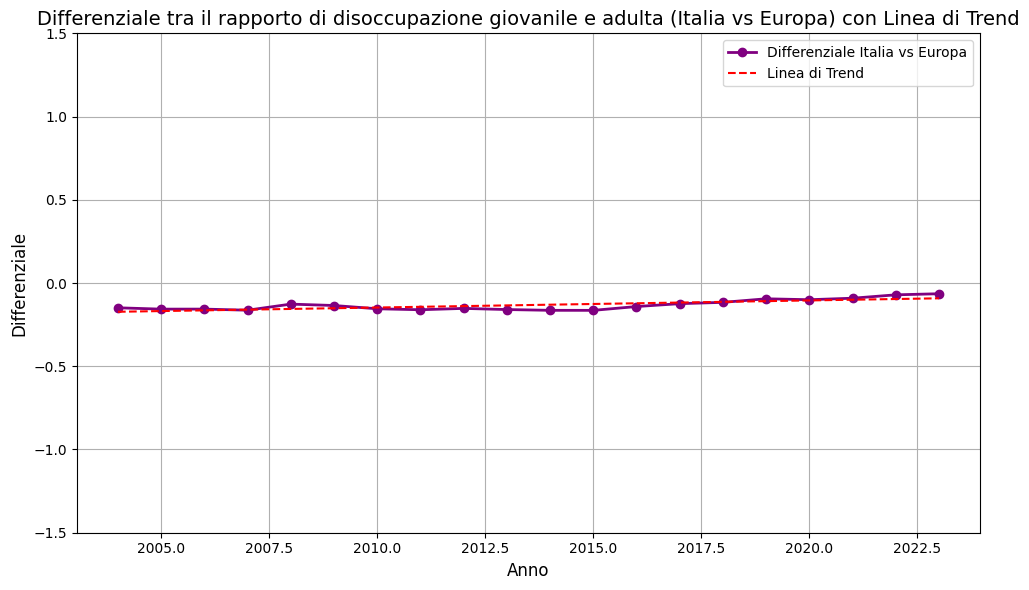

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dei dati
data = pd.read_csv('unem-iteu.csv')

# Filtriamo i dati per la fascia di età "15-24 anni" (Giovani) e "25-64 anni" (Adulti) e lo stato di disoccupazione (UNE)
data_youth_ita = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]
data_adults_ita = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'ITA')]

data_youth_eu = data[(data['AGE'] == 'Y15T24') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]
data_adults_eu = data[(data['AGE'] == 'Y25T64') & (data['LABOUR_FORCE_STATUS'] == 'UNE') & (data['REF_AREA'] == 'EU27')]

# Selezioniamo solo le colonne 'TIME_PERIOD', 'OBS_VALUE' e 'REF_AREA'
data_youth_ita = data_youth_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_ita = data_adults_ita[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_youth_eu = data_youth_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]
data_adults_eu = data_adults_eu[['TIME_PERIOD', 'OBS_VALUE', 'REF_AREA']]

# Rimuoviamo i valori NaN
data_youth_ita = data_youth_ita.dropna(subset=['OBS_VALUE'])
data_adults_ita = data_adults_ita.dropna(subset=['OBS_VALUE'])
data_youth_eu = data_youth_eu.dropna(subset=['OBS_VALUE'])
data_adults_eu = data_adults_eu.dropna(subset=['OBS_VALUE'])

# Convertiamo la colonna 'TIME_PERIOD' in formato numerico
data_youth_ita['TIME_PERIOD'] = pd.to_numeric(data_youth_ita['TIME_PERIOD'], errors='coerce')
data_adults_ita['TIME_PERIOD'] = pd.to_numeric(data_adults_ita['TIME_PERIOD'], errors='coerce')
data_youth_eu['TIME_PERIOD'] = pd.to_numeric(data_youth_eu['TIME_PERIOD'], errors='coerce')
data_adults_eu['TIME_PERIOD'] = pd.to_numeric(data_adults_eu['TIME_PERIOD'], errors='coerce')

# Filtriamo i dati per includere solo gli anni tra il 2009 e il 2023
data_youth_ita = data_youth_ita[(data_youth_ita['TIME_PERIOD'] >= 2004) & (data_youth_ita['TIME_PERIOD'] <= 2023)]
data_adults_ita = data_adults_ita[(data_adults_ita['TIME_PERIOD'] >= 2004) & (data_adults_ita['TIME_PERIOD'] <= 2023)]
data_youth_eu = data_youth_eu[(data_youth_eu['TIME_PERIOD'] >= 2004) & (data_youth_eu['TIME_PERIOD'] <= 2023)]
data_adults_eu = data_adults_eu[(data_adults_eu['TIME_PERIOD'] >= 2004) & (data_adults_eu['TIME_PERIOD'] <= 2023)]

# Ordinare i dati per l'anno
data_youth_ita = data_youth_ita.sort_values(by='TIME_PERIOD')
data_adults_ita = data_adults_ita.sort_values(by='TIME_PERIOD')
data_youth_eu = data_youth_eu.sort_values(by='TIME_PERIOD')
data_adults_eu = data_adults_eu.sort_values(by='TIME_PERIOD')

# Calcolare il rapporto tra disoccupati adulti e giovani
ratio_ita = data_adults_ita['OBS_VALUE'].values / data_youth_ita['OBS_VALUE'].values
ratio_eu = data_adults_eu['OBS_VALUE'].values / data_youth_eu['OBS_VALUE'].values

# Calcolare i differenziali tra Italia e Europa
differential_ita_eu = ratio_ita - ratio_eu

# Calcolare la linea di trend del differenziale
coefficients = np.polyfit(data_youth_ita['TIME_PERIOD'], differential_ita_eu, 1)  # 1 indica una retta
trend_line = np.polyval(coefficients, data_youth_ita['TIME_PERIOD'])  # Valori della retta di trend

# Creare il grafico per il differenziale
plt.figure(figsize=(10, 6))

# Tracciare il differenziale
plt.plot(data_youth_ita['TIME_PERIOD'], differential_ita_eu, marker='o', linestyle='-', color='purple', linewidth=2, markersize=6, label="Differenziale Italia vs Europa")

# Aggiungere la linea di trend
plt.plot(data_youth_ita['TIME_PERIOD'], trend_line, color='red', linestyle='--', label="Linea di Trend")

# Espandere l'asse y per rendere visibile il differenziale
plt.ylim(-1.5, 1.5)  # Limiti dell'asse y espansi per visualizzare meglio la linea orizzontale

# Aggiungere il titolo e le etichette
plt.title('Differenziale tra il rapporto di disoccupazione giovanile e adulta (Italia vs Europa) con Linea di Trend', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Differenziale', fontsize=12)

# Mostrare la griglia
plt.grid(True)

# Aggiungere la legenda
plt.legend()

# Visualizzare il grafico
plt.tight_layout()
plt.show()


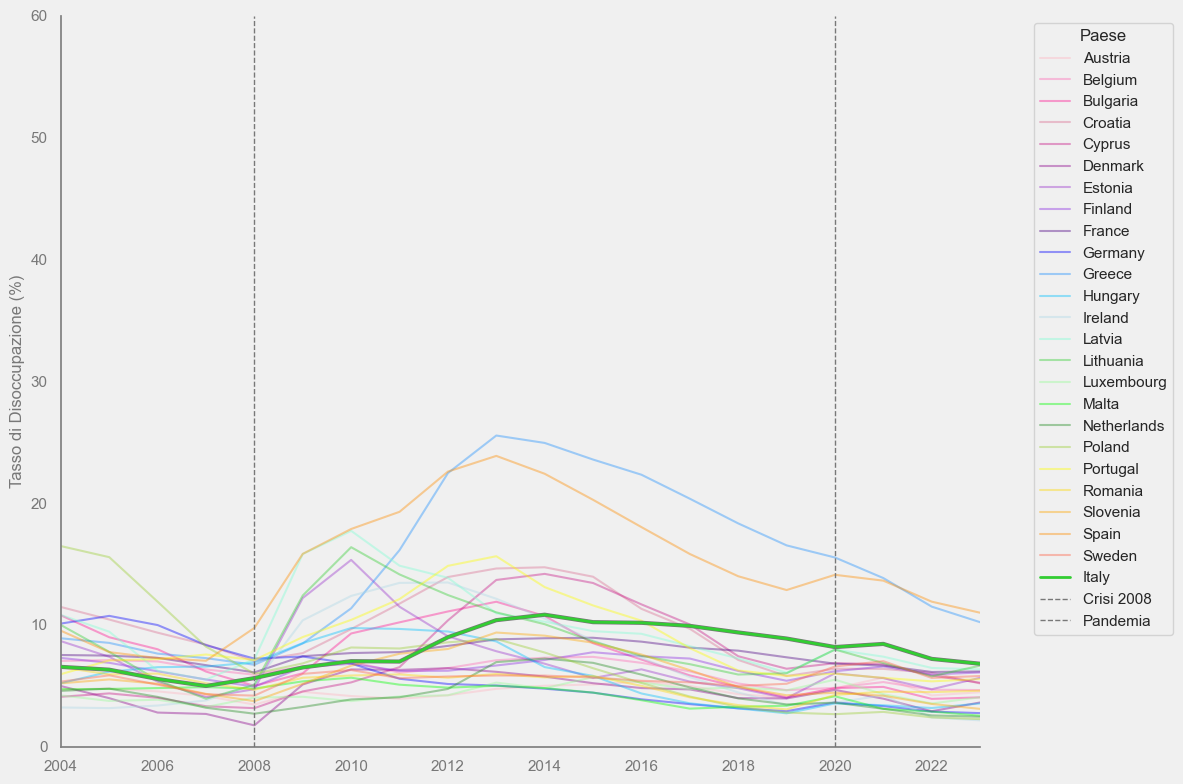

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei dati
data = pd.read_csv('./disMondoAd.csv')

# Dizionario per mappare le sigle ISO ai nomi completi dei paesi
country_name_map = {
    'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'HRV': 'Croatia', 'CYP': 'Cyprus',
    'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France',
    'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland', 'ITA': 'Italy',
    'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MLT': 'Malta', 'NLD': 'Netherlands',
    'POL': 'Poland', 'PRT': 'Portugal', 'ROU': 'Romania', 'SVK': 'Slovakia', 'SVN': 'Slovenia',
    'ESP': 'Spain', 'SWE': 'Sweden'
}

# Filtrare i dati per i paesi UE, età adulta (Y25T64) e disoccupazione (UNE)
adult_unemployment = data[ 
    (data['REF_AREA'].isin(country_name_map.keys())) & 
    (data['AGE'] == 'Y25T64') &  # Età adulta
    (data['LABOUR_FORCE_STATUS'] == 'UNE')  # Disoccupazione
]

# Selezionare solo le colonne utili
adult_unemployment = adult_unemployment[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]

# Rinominare le colonne per chiarezza
adult_unemployment = adult_unemployment.rename(columns={
    'REF_AREA': 'Country Code',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Adult_Unemployment'
})

# Aggiungere i nomi dei paesi
adult_unemployment['Country Name'] = adult_unemployment['Country Code'].map(country_name_map)

# Rimuovere duplicati
adult_unemployment = adult_unemployment.drop_duplicates()

# Rimuovere valori NaN
adult_unemployment = adult_unemployment.dropna(subset=['Adult_Unemployment'])

# Unire valori duplicati (se presenti)
adult_unemployment = adult_unemployment.groupby(['Country Name', 'Year'], as_index=False)['Adult_Unemployment'].mean()

# Escludere Slovacchia e Repubblica Ceca
adult_unemployment_filtered = adult_unemployment[~adult_unemployment['Country Name'].isin(['Slovakia', 'Czech Republic'])]

# Confermare dati per l'Italia
italy_data = adult_unemployment_filtered[adult_unemployment_filtered['Country Name'] == 'Italy']

# Paletta dei colori pastello
pastel_palette = [
    "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585", "#8B008B", "#9932CC", "#8A2BE2",
    "#4B0082", "#0000FF", "#1E90FF", "#00BFFF", "#ADD8E6", "#7FFFD4", "#32CD32", "#98FB98",
    "#00FF00", "#228B22", "#9ACD32", "#FFFF00", "#FFD700", "#FFA500", "#FF8C00", "#FF6347",
    "#FF4500", "#DC143C", "#B22222", "#A52A2A", "#8B4513"
]

# Visualizzazione del grafico
plt.figure(figsize=(12, 8))

# Linee per tutti i paesi con colori distinti senza Italia
adult_unemployment_no_italy = adult_unemployment_filtered[adult_unemployment_filtered['Country Name'] != 'Italy']
for i, (name, group) in enumerate(adult_unemployment_no_italy.groupby('Country Name')):
    plt.plot(group['Year'], group['Adult_Unemployment'], label=name, color=pastel_palette[i % len(pastel_palette)], alpha=0.4)

# Evidenziare la linea per l'Italia
plt.plot(italy_data['Year'], italy_data['Adult_Unemployment'], color='#787878', linewidth=3, zorder=2)  # Bordo nero
plt.plot(italy_data['Year'], italy_data['Adult_Unemployment'], color='#32CD32', label='Italy', linewidth=2, zorder=3)  # Verde

# Linee per eventi importanti
plt.axvline(2008, color='#787878', linestyle='--', linewidth=1, label='Crisi 2008', zorder=4)
plt.axvline(2020, color='#787878', linestyle='--', linewidth=1, label='Pandemia', zorder=4)

# Titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', color='#787878')
plt.xlabel('')
plt.xticks(ticks=range(2004, 2024, 2), labels=[str(year) for year in range(2004, 2024, 2)], color='#787878')
plt.yticks(color='#787878')
plt.xlim(left=2004)
plt.xlim(right=2023)

# Impostare limiti dell'asse Y da 0 a 60
plt.ylim(0, 60)

# Legenda
plt.legend(title='Paese', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='#F0F0F0')

# Sfondo del grafico
plt.gca().set_facecolor('#F0F0F0')
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Rimuovere la griglia
plt.grid(False)

# Rimuovere i trattini dagli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)
plt.gca().tick_params(axis='y', which='both', left=False, right=False)

plt.tight_layout()
plt.show()


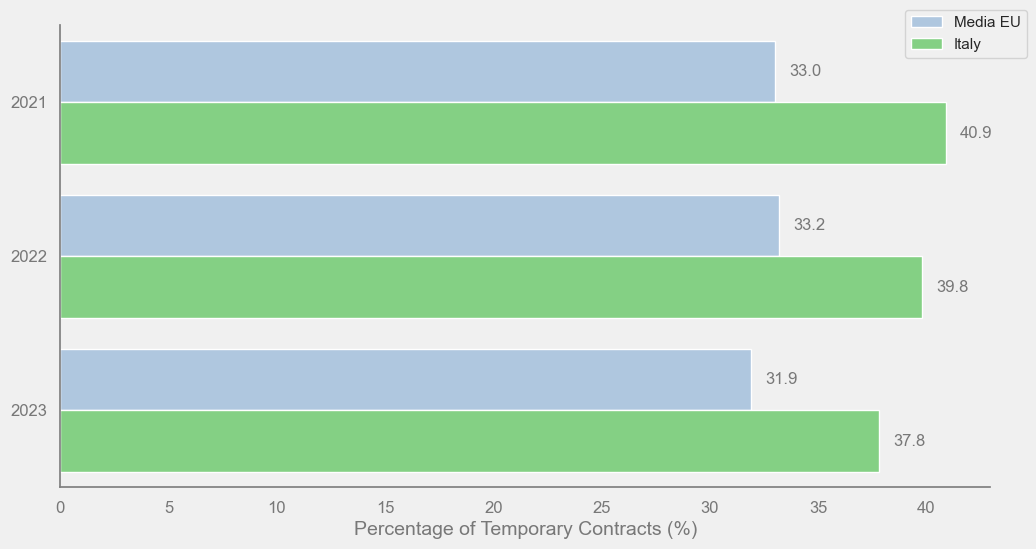

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file CSV (sostituisci 'contrattiDet.csv' con il percorso del tuo file CSV)
df = pd.read_csv('contrattiDet.csv')

# Filtra i dati per includere solo gli anni 2021, 2022 e 2023
df_filtered = df[df['TIME_PERIOD'].isin([2021, 2022, 2023])]

# Seleziona solo Italia e media europea
df_filtered = df_filtered[df_filtered['geo'].isin(['Italy', 'European Union - 27 countries (from 2020)'])]

# Modifica il nome della media europea nella colonna 'geo'
df_filtered['geo'] = df_filtered['geo'].replace('European Union - 27 countries (from 2020)', 'Media EU')

# Imposta il tema di Seaborn per una visualizzazione migliore
sns.set(style="whitegrid")

# Crea il grafico a barre orizzontali per visualizzare la percentuale di contratti a tempo determinato per i giovani
plt.figure(figsize=(12, 6))

# Usa colori specifici per Italia e Europa
color_map = {'Italy': '#77DD77', 'Media EU': '#A7C7E7'}

# Crea un grafico a barre orizzontali
ax = sns.barplot(x='OBS_VALUE', y='TIME_PERIOD', data=df_filtered, hue='geo', palette=color_map, orient='h', dodge=True)

# Aggiungi la percentuale alla fine di ciascuna barra
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Aggiungi la percentuale solo se maggiore di 0
        ax.text(width + 1.4, p.get_y() + p.get_height() / 2, f'{width:.1f}', 
                fontsize=12,  ha='center', va='center', color='#787878')

# Aggiungi titoli e etichette agli assi
#plt.title('Percentage of Temporary Contracts for Young People in Italy and EU (2021-2023)', fontsize=16)
plt.xlabel('Percentage of Temporary Contracts (%)', fontsize=14, color='#787878')  # Rimuovi etichetta asse x
plt.ylabel('', fontsize=14, color='#787878')

plt.xticks(fontsize=12, color='#787878')
plt.yticks(fontsize=12, color='#787878')

# Aggiungi la legenda e spostala in alto a destra
plt.legend(title='', bbox_to_anchor=(0.9, 1.05), loc='upper left', facecolor='#F0F0F0')

# Sfondo del grafico
plt.gca().set_facecolor('#F0F0F0')
plt.gcf().patch.set_facecolor('#F0F0F0')

# Rimuovere assi superflui
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Rimuovere la griglia
plt.grid(False)

# Rimuovere i trattini dagli assi
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False)
plt.gca().tick_params(axis='y', which='both', left=False, right=False)

# Mostra il grafico
plt.show()


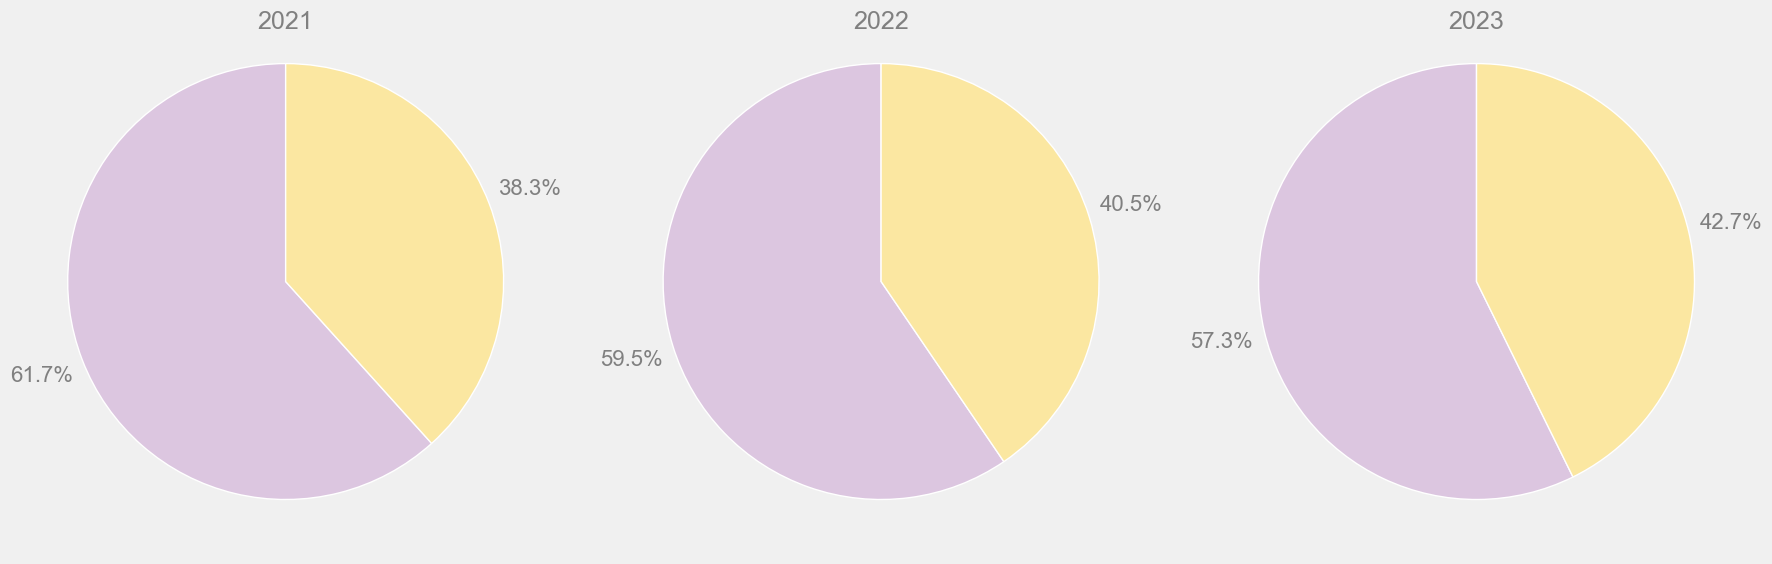

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV (sostituisci 'contratti.csv' con il percorso del tuo file CSV)
df = pd.read_csv('contratti.csv')

# Filtra i dati per gli anni 2021, 2022 e 2023
df_2021 = df[df['TIME_PERIOD'] == 2021]
df_2022 = df[df['TIME_PERIOD'] == 2022]
df_2023 = df[df['TIME_PERIOD'] == 2023]

# Somma i valori di 'OBS_VALUE' per i contratti a tempo determinato (PERM_TEMP_EMPLOYEES=1) e indeterminato (PERM_TEMP_EMPLOYEES=2) per ciascun anno
determinato_2021 = df_2021[df_2021['PERM_TEMP_EMPLOYEES'] == 1]['OBS_VALUE'].sum()
indeterminato_2021 = df_2021[df_2021['PERM_TEMP_EMPLOYEES'] == 2]['OBS_VALUE'].sum()

determinato_2022 = df_2022[df_2022['PERM_TEMP_EMPLOYEES'] == 1]['OBS_VALUE'].sum()
indeterminato_2022 = df_2022[df_2022['PERM_TEMP_EMPLOYEES'] == 2]['OBS_VALUE'].sum()

determinato_2023 = df_2023[df_2023['PERM_TEMP_EMPLOYEES'] == 1]['OBS_VALUE'].sum()
indeterminato_2023 = df_2023[df_2023['PERM_TEMP_EMPLOYEES'] == 2]['OBS_VALUE'].sum()

# Prepara i dati per i grafici a torta
sizes_2021 = [determinato_2021, indeterminato_2021]
sizes_2022 = [determinato_2022, indeterminato_2022]
sizes_2023 = [determinato_2023, indeterminato_2023]

# Colori per la torta
colors = ['#DCC6E0', '#FBE7A1']

# Crea i grafici a torta
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grafico a torta per il 2021
wedges_2021, _, autotexts_2021 = axs[0].pie(sizes_2021, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.2, textprops={'fontsize': 16})
axs[0].set_title('2021', fontsize=18, color='gray', y=0.95)  # Spostato verso il basso
for autotext in autotexts_2021:
    autotext.set_color('gray')

# Grafico a torta per il 2022
wedges_2022, _, autotexts_2022 = axs[1].pie(sizes_2022, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.2, textprops={'fontsize': 16})
axs[1].set_title('2022', fontsize=18, color='gray', y=0.95)  # Spostato verso il basso
for autotext in autotexts_2022:
    autotext.set_color('gray')

# Grafico a torta per il 2023
wedges_2023, _, autotexts_2023 = axs[2].pie(sizes_2023, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.2, textprops={'fontsize': 16})
axs[2].set_title('2023', fontsize=18, color='gray', y=0.95)  # Spostato verso il basso
for autotext in autotexts_2023:
    autotext.set_color('gray')

# Aggiungi la legenda con i valori "Determinato" e "Indeterminato"
#labels_legend = ['Determinato', 'Indeterminato']
#fig.legend(wedges_2021, labels_legend, title="Tipo di Contratto", loc="upper right", fontsize=12, title_fontsize=14, facecolor='#F0F0F0')

# Sfondo del grafico
plt.gca().set_facecolor('#F0F0F0')
plt.gcf().patch.set_facecolor('#F0F0F0')

# Mostra i grafici
plt.tight_layout()
plt.show()
